# Rossmann Store Sales
### Data Cleansing & EDA

In [1]:
#library
import pandas as pd

#data
ss=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/sample_submission.csv")
store=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/store.csv")
test=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/test.csv")
train=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/train.csv")

/tmp/ipykernel_1680/3552004247.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/train.csv")


In [ ]:
ss

In [27]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,"1,270.000",9.000,"2,008.000",0,NaN,NaN,NaN
1,2,a,a,570.000,11.000,"2,007.000",1,13.000,"2,010.000","Jan,Apr,Jul,Oct"
2,3,a,a,"14,130.000",12.000,"2,006.000",1,14.000,"2,011.000","Jan,Apr,Jul,Oct"
3,4,c,c,620.000,9.000,"2,009.000",0,NaN,NaN,NaN
4,5,a,a,"29,910.000",4.000,"2,015.000",0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,"1,900.000",6.000,"2,014.000",1,31.000,"2,013.000","Jan,Apr,Jul,Oct"
1111,1112,c,c,"1,880.000",4.000,"2,006.000",0,NaN,NaN,NaN
1112,1113,a,c,"9,260.000",NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.000,NaN,NaN,0,NaN,NaN,NaN


In [4]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
test

In [ ]:
#nrows and ncols of ss
nrow1 = ss.shape[0]
print(nrow1)

ncol1 = ss.shape[1]
print(ncol1)

In [ ]:
#nrows and ncols of Store data
nrow2 = store.shape[0]
print(nrow2)

ncol2 = store.shape[1]
print(ncol2)

In [ ]:
#nrows and ncols of Test data
nrow3 = test.shape[0]
print(nrow3)

ncol3 = test.shape[1]
print(ncol3)

In [ ]:
#nrows and ncols of Train data
nrow4 = train.shape[0]
print(nrow4)

ncol4 = train.shape[1]
print(ncol4)

In [2]:
#Merge Train data with Store data 
data=pd.merge(train,store, on="Store", how="left")

In [9]:
#Nrows and ncols of DATA
nrow5 = data.shape[0]
print(nrow5)

ncol5= data.shape[1]
print(ncol5)

1017209
18


In [3]:
t=pd.merge(test,store, on="Store", how="left")

In [3]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
#Variable types
print(data.info())

In [4]:
#change type of integers as factor
data['DayOfWeek'] = data['DayOfWeek'].astype('category')
data['Promo'] = data['Promo'].astype('category')
data['Open'] = data['Open'].astype('category')
data['SchoolHoliday'] = data['SchoolHoliday'].astype('category')
data['Promo2'] = data['Promo2'].astype('category')
data['CompetitionOpenSinceMonth'] = data['CompetitionOpenSinceMonth'].astype('category')
data['CompetitionOpenSinceYear'] = data['CompetitionOpenSinceYear'].astype('category')
data['Promo2SinceWeek'] = data['Promo2SinceWeek'].astype('category')
data['Promo2SinceYear'] = data['Promo2SinceYear'].astype('category')

In [5]:
#change type of integers as factor
t['DayOfWeek'] = t['DayOfWeek'].astype('category')
t['Promo'] = t['Promo'].astype('category')
t['Open'] = t['Open'].astype('category')
t['SchoolHoliday'] = t['SchoolHoliday'].astype('category')
t['Promo2'] = t['Promo2'].astype('category')
t['CompetitionOpenSinceMonth'] = t['CompetitionOpenSinceMonth'].astype('category')
t['CompetitionOpenSinceYear'] = t['CompetitionOpenSinceYear'].astype('category')
t['Promo2SinceWeek'] = t['Promo2SinceWeek'].astype('category')
t['Promo2SinceYear'] = t['Promo2SinceYear'].astype('category')

In [6]:
#check for NA or NaN
na_columns=data.isna().any()
print(na_columns)

Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool


In [7]:
#check for NA or NaN
na_columns=t.isna().any()
print(na_columns)

Id                           False
Store                        False
DayOfWeek                    False
Date                         False
Open                          True
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool


In [ ]:
#SD CALCULATION IN ORDER TO DECIDE IF I AM GOING TO USE MEDIAN OR MEAN VALUE TO REPLACE NA
#PANDAS IGNORE NA & NAN
print(data.describe())

#Variables have large sd so it is better to replace with median value
#I replace NAs in categorical variables with the most frequent value

In [6]:
median_value = data["CompetitionDistance"].median()
data["CompetitionDistance"] = data["CompetitionDistance"].fillna(median_value)

In [7]:
m_freq = data["CompetitionOpenSinceMonth"].mode()[0]
data["CompetitionOpenSinceMonth"] = data["CompetitionOpenSinceMonth"].fillna(m_freq)

In [8]:
m_freq = data["CompetitionOpenSinceYear"].mode()[0]
data["CompetitionOpenSinceYear"] = data["CompetitionOpenSinceYear"].fillna(m_freq)

In [9]:
m_freq = data["Promo2SinceWeek"].mode()[0]
data["Promo2SinceWeek"] = data["Promo2SinceWeek"].fillna(m_freq)

In [10]:
m_freq = data["Promo2SinceYear"].mode()[0]
data["Promo2SinceYear"] = data["Promo2SinceYear"].fillna(m_freq)

In [11]:
most_frequent = data["PromoInterval"].mode()[0]
data["PromoInterval"] = data["PromoInterval"].fillna(most_frequent)

In [12]:
#Replace NAs in test data
m_freq = t["Open"].mode()[0]
t["Open"] = t["Open"].fillna(m_freq)
median_value = t["CompetitionDistance"].median()
t["CompetitionDistance"] =t["CompetitionDistance"].fillna(median_value)
m_freq = t["CompetitionOpenSinceMonth"].mode()[0]
t["CompetitionOpenSinceMonth"] = t["CompetitionOpenSinceMonth"].fillna(m_freq)
m_freq = t["CompetitionOpenSinceYear"].mode()[0]
t["CompetitionOpenSinceYear"] = t["CompetitionOpenSinceYear"].fillna(m_freq)
m_freq = t["Promo2SinceWeek"].mode()[0]
t["Promo2SinceWeek"] = t["Promo2SinceWeek"].fillna(m_freq)
m_freq = t["Promo2SinceYear"].mode()[0]
t["Promo2SinceYear"] = t["Promo2SinceYear"].fillna(m_freq)
most_frequent = t["PromoInterval"].mode()[0]
t["PromoInterval"] = t["PromoInterval"].fillna(most_frequent)

In [15]:
#check
na_columns=t.isna().any()
print(na_columns)

Id                           False
Store                        False
DayOfWeek                    False
Date                         False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
dtype: bool


In [ ]:
#Open stores with no sales for some reasons
data[(data.Open == 1) & (data.Sales== 0)]

In [11]:
#number of stores with zero sales
open_zero_sales=data[(data['Open']==1)&(data['Sales']==0)]
stores_with_zero_sales=open_zero_sales['Store'].nunique()
print(stores_with_zero_sales)

41


In [13]:
#Replace zero sales for open stores with median value
median_sales=data[(data['Open'] == 1)&(data['Sales'] > 0)]['Sales'].median()
data.loc[(data['Open'] == 1) & (data['Sales'] == 0), 'Sales'] = median_sales

In [14]:
#There are open stores with no customers
#Replace with median value of customers
median_cust = data[(data['Open'] == 1) & (data['Customers'] > 0)]['Customers'].median()
data.loc[(data['Open'] == 1) & (data['Customers'] == 0), 'Customers'] = median_cust

In [ ]:
#rows in data with closed stores and withouts sales
data[(data["Open"]==0) & (data["Sales"]==0)]

In [18]:
#Check tha we have replaced NAs
na_columns_check1 = data.isna().any()
print(na_columns_check1)

Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
dtype: bool


In [ ]:
#Check for wrong data
data[data["Sales"]<0]

In [ ]:
#Check for wrong data
data[data["Customers"]<0]

In [12]:
#Check for variable levels
print(data["Open"].unique())
data["StateHoliday"] =data["StateHoliday"].astype(str)
print(data["StateHoliday"].unique())
print(data["SchoolHoliday"].unique())
print(data["StoreType"].unique())
print(data["Assortment"].unique())
print(data["CompetitionOpenSinceMonth"].unique())
print(data["CompetitionOpenSinceYear"].unique())
print(data["Promo2"].unique())
print(data["Promo2SinceWeek"].unique())
print(data["Promo2SinceYear"].unique())
print(data["PromoInterval"].unique())

[1, 0]
Categories (2, int64): [0, 1]
['0' 'a' 'b' 'c']
[1, 0]
Categories (2, int64): [0, 1]
['c' 'a' 'd' 'b']
['a' 'c' 'b']
[9.0, 11.0, 12.0, 4.0, 10.0, ..., 6.0, 5.0, 1.0, 2.0, 7.0]
Length: 12
Categories (12, float64): [1.0, 2.0, 3.0, 4.0, ..., 9.0, 10.0, 11.0, 12.0]
[2008.0, 2007.0, 2006.0, 2009.0, 2015.0, ..., 2001.0, 1990.0, 1994.0, 1900.0, 1998.0]
Length: 23
Categories (23, float64): [1900.0, 1961.0, 1990.0, 1994.0, ..., 2012.0, 2013.0, 2014.0, 2015.0]
[0, 1]
Categories (2, int64): [0, 1]
[14.0, 13.0, 1.0, 45.0, 40.0, ..., 36.0, 50.0, 44.0, 49.0, 28.0]
Length: 24
Categories (24, float64): [1.0, 5.0, 6.0, 9.0, ..., 45.0, 48.0, 49.0, 50.0]
[2011.0, 2010.0, 2012.0, 2009.0, 2014.0, 2015.0, 2013.0]
Categories (7, float64): [2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]
['Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [15]:
data['StateHoliday']=data['StateHoliday'].astype(str).str.strip()

In [ ]:
#Check for wrong data
data[data["CompetitionDistance"]<0]

# Descriptive statistics & Frequencies 

In [16]:
#Library for skewness and kurtosis
from scipy.stats import skew, kurtosis

In [18]:
data["PromoInterval"].value_counts()

PromoInterval
Jan,Apr,Jul,Oct     801153
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: count, dtype: int64

In [19]:
data["Promo2"].value_counts()

Promo2
1    509178
0    508031
Name: count, dtype: int64

In [15]:
data["Promo2SinceYear"].value_counts()

Promo2SinceYear
2011.0    623087
2013.0    110464
2014.0     79922
2012.0     73174
2009.0     65270
2010.0     56240
2015.0      9052
Name: count, dtype: int64

In [16]:
data["Promo2SinceWeek"].value_counts()

Promo2SinceWeek
14.0    581021
40.0     62598
31.0     39976
10.0     38828
5.0      35818
37.0     32786
1.0      32418
13.0     29820
45.0     29268
22.0     28694
18.0     27318
35.0     22814
9.0      12452
27.0      9626
36.0      9236
48.0      8294
39.0      4732
23.0      4342
44.0      2642
28.0       942
26.0       942
6.0        942
50.0       942
49.0       758
Name: count, dtype: int64

In [19]:
data["CompetitionOpenSinceYear"].value_counts()

CompetitionOpenSinceYear
2,013.000    398774
2,012.000     74299
2,014.000     63732
2,005.000     56564
2,010.000     51258
2,011.000     49396
2,009.000     49396
2,008.000     48476
2,007.000     43744
2,006.000     42802
2,015.000     35060
2,002.000     24882
2,004.000     19804
2,003.000     16794
2,001.000     14704
2,000.000      9236
1,999.000      7352
1,990.000      4710
1,994.000      1884
1,995.000      1700
1,961.000       942
1,998.000       942
1,900.000       758
Name: count, dtype: int64

In [20]:
data["CompetitionOpenSinceMonth"].value_counts()

CompetitionOpenSinceMonth
9.000     437602
4.000      87076
11.000     84455
3.000      63548
7.000      59434
12.000     57896
10.000     55622
6.000      45444
5.000      39608
2.000      37886
8.000      36186
1.000      12452
Name: count, dtype: int64

In [48]:
data["CompetitionDistance"].describe()

count   1,017,209.000
mean        5,422.034
std         7,706.913
min            20.000
25%           710.000
50%         2,330.000
75%         6,880.000
max        75,860.000
Name: CompetitionDistance, dtype: float64

In [50]:
data["CompetitionDistance"].median()

2330.0

In [51]:
print(skew(data["CompetitionDistance"]))
print(kurtosis(data["CompetitionDistance"]))

2.933461996905461
13.040492612167675


In [22]:
data["Assortment"].value_counts()

Assortment
a    537445
c    471470
b      8294
Name: count, dtype: int64

In [23]:
data["StoreType"].value_counts()

StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64

In [24]:
data["SchoolHoliday"].value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

In [25]:
data["StateHoliday"].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [26]:
data["Promo"].value_counts()

Promo
0    629129
1    388080
Name: count, dtype: int64

In [27]:
data["Open"].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [28]:
data["Customers"].describe()

count   1,017,209.000
mean          633.181
std           464.390
min             0.000
25%           405.000
50%           609.000
75%           837.000
max         7,388.000
Name: Customers, dtype: float64

In [44]:
data["Customers"].median()

609.0

In [46]:
print(kurtosis(data["Customers"]))
print(skew(data["Customers"]))

7.092988746065641
1.5987811262566627


In [29]:
data["Sales"].describe()

count   1,017,209.000
mean        5,774.157
std         3,849.699
min             0.000
25%         3,728.000
50%         5,744.000
75%         7,856.000
max        41,551.000
Name: Sales, dtype: float64

In [31]:
data["Sales"].median()

5744.0

In [ ]:
#Skewness and Kyrtosis
skewness=skew(data["Sales"])
kyr=kurtosis(data["Sales"])

In [33]:
print(skewness)
print(kyr)

0.641488173049176
1.7789953406337427


In [30]:
data["DayOfWeek"].value_counts()

DayOfWeek
4    145845
5    145845
3    145665
2    145664
1    144730
6    144730
7    144730
Name: count, dtype: int64

# Univariate Analysis with Plots

In [16]:
#libraries
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

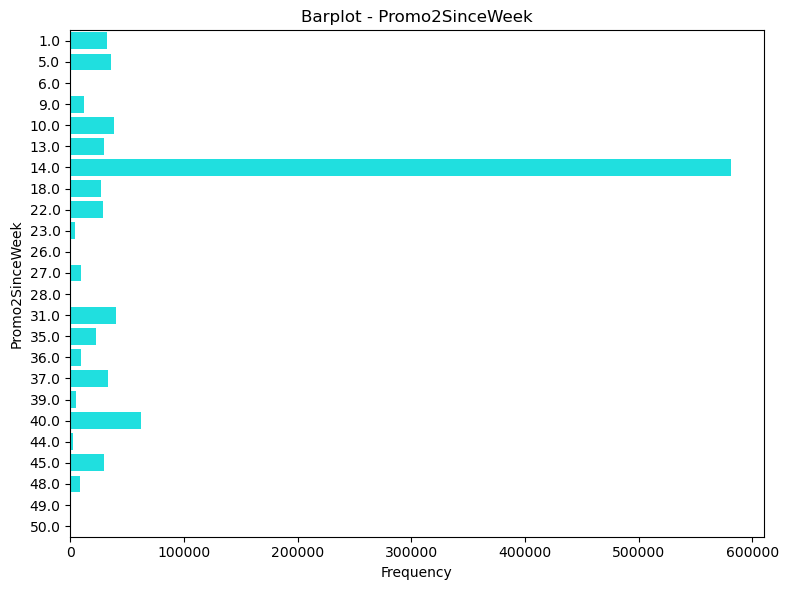

In [16]:
#Barplot for Promo2SinceWeek
plt.figure(figsize=(8, 6))
sns.countplot(y="Promo2SinceWeek", data=data, color="cyan")
plt.title("Barplot - Promo2SinceWeek")
plt.xlabel("Frequency")
plt.ylabel("Promo2SinceWeek")
plt.tight_layout()
plt.show()

In [ ]:
#Barplot for Promo2SinceYear
plt.figure(figsize=(8,6))
sns.countplot(y="Promo2SinceYear", data=data,color="cyan")
plt.title("Barplot - Promo2 Since Year")
plt.xlabel("Frequency")
plt.ylabel("Promo2SinceYear")
plt.tight_layout()
plt.show()

In [ ]:
#Barplot for PromoInterval
sns.countplot(x="PromoInterval", data=data,color="cyan")
plt.title("Barplot - PromoInterval")
plt.xlabel("PromoInterval")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Pie chart for Promo Interval with percentages
promo_counts=data['PromoInterval'].value_counts()
plt.pie(promo_counts,labels=promo_counts.index,autopct='%1.1f%%')
plt.title("Pie Chart-PromoInterval")

In [ ]:
##Barplot for Promo2
sns.countplot(x="Promo2", data=data,color="cyan")
plt.title("Barplot - Promo2")
plt.xlabel("Promo2")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=not participating/1=participating")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
## Horizontal Barplot for CompetitionOpenSinceYear
plt.figure(figsize=(8, 6))
sns.countplot(y="CompetitionOpenSinceYear", data=data, color="cyan")
plt.title("Barplot - Competition Open Since Year")
plt.xlabel("Frequency")
plt.ylabel("CompetitionOpenSinceYear")
plt.tight_layout()
plt.show()

In [ ]:
#Barplot for CompetitionOpenSinceMonth
sns.countplot(x="CompetitionOpenSinceMonth", data=data,color="cyan")
plt.title("Barplot - CompetitionOpenSinceMonth")
plt.xlabel("CompetitionOpenSinceMonth")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Boxplot for CompetitionDistance
sns.boxplot(y="CompetitionDistance", data=data, color="cyan")
plt.title("Boxplot -CompetitionDistance")
plt.ylabel("CompetitionDistance")
plt.show()

In [ ]:
#Histogram of CompetitionDistance
sns.histplot(data=data, x="CompetitionDistance",color="Cyan")
plt.title("Histogram of CompetitionDistance")
plt.xlabel("CompetitionDIstance")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Barplot for variety of products
sns.countplot(x="Assortment", data=data,color="cyan")
plt.title("Barplot - Assortment")
plt.xlabel("Assortment")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=basic/b=extra/c=extended")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Pie chart for variety of products with percentages
a=data['Assortment'].value_counts()
colors=['lightblue','lightgreen','lightcoral']
plt.pie(a,labels=a.index,colors=colors,autopct='%1.1f%%')
plt.title("Pie Chart - Assortment")
plt.legend(["Basic","Extended","Extra"],loc="best")
plt.show()

In [ ]:
#Barplot for StoreType
sns.countplot(x="StoreType", data=data,color="cyan")
plt.title("Barplot - Storetype")
plt.xlabel("StoreType")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Beauty|b=Online |c=Health |d=Home")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Pie chart for storetype with percentages
st=data['StoreType'].value_counts()
colors=['lightblue','lightgreen','lightcoral',"lightyellow"]
plt.pie(st,labels=st.index,colors=colors,autopct='%1.1f%%')
plt.title("Pie Chart - StoreType")
plt.legend(["Beauty","Home","Health","Online"],loc="best")
plt.show()

In [ ]:
#Barplot with frequencies for SchoolHoliday
sns.countplot(x="SchoolHoliday", data=data,color="cyan")
plt.title("Barplot - SchoolHoliday")
plt.xlabel("SchoolHoliday")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=Not Affected / 1=Affected")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Barplot for StateHoliday
sns.countplot(x="StateHoliday", data=data,color="cyan")
plt.title("Barplot - StateHoliday")
plt.xlabel("StateHoliday")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Public Holiday/ b=Easter/ c=Christmas/0=None")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
##Barplot for Promo
sns.countplot(x="Promo", data=data, color="cyan")
plt.title("Barplot - Promo")
plt.xlabel("Promo")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0 = No Promo / 1 = Promo")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Barplot for open and closed stores
sns.countplot(x="Open", data=data, color="cyan")
plt.title("Barplot - Open")
plt.xlabel("Open")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0 = Closed / 1 = Open")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Barplot for Dayofweek
sns.countplot(x="DayOfWeek", data=data, color="cyan")
plt.title("Barplot - DayOfWeek")
plt.xlabel("Day Of Week")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Histogram for sales
#Some stores were temporarily closed for refurbishment!
sns.histplot(data=data, x="Sales",color="Cyan")
plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Histogram of sales for open stores
os = data[data['Open'] == 1]
sns.histplot(data=os, x="Sales", color="cyan")
plt.title("Histogram of Sales for Open Stores")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Boxplot of sales
sns.boxplot(y="Sales", data=data, color="cyan")
plt.title("Boxplot of Sales")
plt.ylabel("Sales")
plt.show()

In [ ]:
#Histogram of customers
sns.histplot(data=data, x="Customers",color="Cyan")
plt.title("Histogram of Customers")
plt.xlabel("Customers")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Boxplot of customers
sns.boxplot(y="Customers", data=data, color="cyan")
plt.title("Boxplot of Customers")
plt.ylabel("Customers")
plt.show()

# Correlation between variables

In [17]:
#Libraries
from scipy.stats import kstest
import statsmodels.formula.api as smf
import numpy as np

In [13]:
#Sales~Customers
print(data["Sales"].corr(data["Customers"], method='pearson'),
data["Sales"].corr(data["Customers"], method='spearman'),
data["Sales"].corr(data["Customers"], method='kendall'))

0.8946977306504313 0.9033304972203227 0.7463438699359183


Text(0, 0.5, 'Customers')

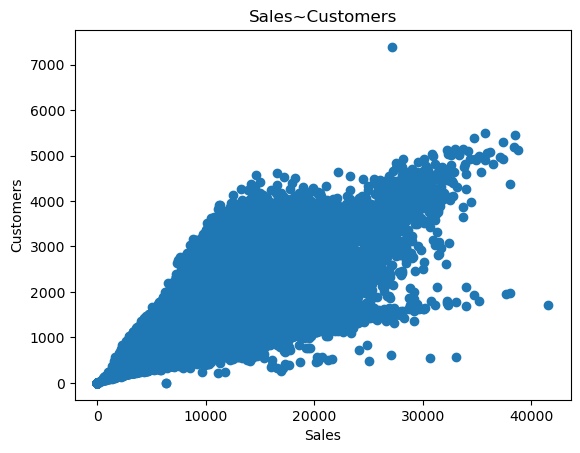

In [29]:
#Plot between Sales~Customers
plt.scatter(data["Sales"], data["Customers"])
plt.title("Sales~Customers")
plt.xlabel("Sales")
plt.ylabel("Customers")

### Assumptions:
### Normality of residuals
### Homoscedasticity 
### Linearity
### Outliers
### Independence

### If model assumptions are not met then we use Kendall & Spearman methods for correlation

In [16]:
#library
import statsmodels.formula.api as smf
#model sales~customers
model1=smf.ols("Sales~Customers",data=data).fit()
print(model1.summary())

#Jarque-Bera normality test (n>2000) indicates that residulas are not normally distributed 
#We have many outliers in Sales & Customers 
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 4.081e+06
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        15:50:14   Log-Likelihood:            -9.0214e+06
No. Observations:             1017209   AIC:                         1.804e+07
Df Residuals:                 1017207   BIC:                         1.804e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1077.9421      2.883    373.916      0.0

In [19]:
#Normality test
residuals=model1.resid
statistic,p_value=kstest(residuals,'norm',args=(np.mean(residuals),np.std(residuals)))
print(f"Kolmogorov-Smirnov Statistic:{statistic}")
print(f"P-value:{p_value}")

Kolmogorov-Smirnov Statistic:0.12592733223319835
P-value:0.0


In [20]:
#Sales~CompetitionDistance
print(data["Sales"].corr(data["CompetitionDistance"], method='pearson'),
data["Sales"].corr(data["CompetitionDistance"], method='spearman'),
data["Sales"].corr(data["CompetitionDistance"], method='kendall'))

-0.018901990568970007 -0.024190048333857895 -0.015721429623566426


In [ ]:
#Plot for Sales~CompetitionDistance
plt.scatter(data["Sales"], data["CompetitionDistance"],color="cyan")
plt.title("Sales~CompetitionDistance")
plt.xlabel("Sales")
plt.ylabel("CompetitionDistance")

In [24]:
#model Sales~CompetitionDistance
model2=smf.ols("Sales~CompetitionDistance",data=data).fit()
print(model2.summary())
#Jarque-Bera normality test indicates that residulas are not normally distributed 
#We have many outliers in Sales & CompetitionDistance
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test
#There is no correlation between the 2 variables

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     363.6
Date:                Mon, 19 May 2025   Prob (F-statistic):           4.87e-81
Time:                        16:41:02   Log-Likelihood:            -9.8410e+06
No. Observations:             1017209   AIC:                         1.968e+07
Df Residuals:                 1017207   BIC:                         1.968e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5825.3507    

In [25]:
#Normality test
residuals=model2.resid
statistic,p_value=kstest(residuals,'norm',args=(np.mean(residuals),np.std(residuals)))
print(f"Kolmogorov-Smirnov Statistic:{statistic}")
print(f"P-value:{p_value}")

Kolmogorov-Smirnov Statistic:0.09289456708497135
P-value:0.0


In [27]:
#Customers~CompetitionDistance
print(data["Customers"].corr(data["CompetitionDistance"], method='pearson'),
data["Customers"].corr(data["CompetitionDistance"], method='spearman'),
data["Customers"].corr(data["CompetitionDistance"], method='kendall'))

-0.10239354680187586 -0.1769468031123368 -0.11922518432675475


In [ ]:
#Plot customers~competitionDistance
plt.scatter(data["Customers"], data["CompetitionDistance"],color="cyan")
plt.title("Customers~CompetitionDistance")
plt.xlabel("Customers")
plt.ylabel("CompetitionDistance")

In [30]:
#model Customers~CompetitionDistance
model3=smf.ols("Customers~CompetitionDistance",data=data).fit()
print(model3.summary())
#Jarque-Bera normality test indicates that residulas are not normally distributed 
#We have many outliers in Customers & CompetitionDistance
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test
#There is no correlation between the 2 variables

                            OLS Regression Results                            
Dep. Variable:              Customers   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        16:50:13   Log-Likelihood:            -7.6844e+06
No. Observations:             1017209   AIC:                         1.537e+07
Df Residuals:                 1017207   BIC:                         1.537e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             666.6337    

In [31]:
#Normality test
residuals=model3.resid
statistic,p_value=kstest(residuals,'norm',args=(np.mean(residuals),np.std(residuals)))
print(f"Kolmogorov-Smirnov Statistic:{statistic}")
print(f"P-value:{p_value}")

Kolmogorov-Smirnov Statistic:0.07836988396258215
P-value:0.0


### Correlation for categorical~categorical
### X^2 test with H0: No relationship vs H1:There is relationship 
### a=5%

In [32]:
#PROMO~SCHOOLHOLIDAY
from scipy import stats
table=pd.crosstab(data['Promo'],data['SchoolHoliday'])
chi_stat, p_value, df, expected = stats.chi2_contingency(table)
print(p_value,chi_stat,expected)

#p-value<a so we reject H0
#School Holidays have impact on whether a promo will take place or not

0.0 4631.935870089784 [[516737.19948604 112391.80051396]
 [318750.80051396  69329.19948604]]


In [33]:
#PROMO~STATEHOLIDAY
#data['Promo'] = data['Promo'].astype(str)
data['StateHoliday'] = data['StateHoliday'].astype(str)
table1 = pd.crosstab(data['Promo'], data['StateHoliday'])
chi_stat,p_val,df,expected_val=stats.chi2_contingency(table1)
print(p_val,chi_stat)

#State Holidays have impact on whether a promo will take place or not

0.0 2948.087398538137


### Non parametric Wilcoxon test for Sales~Promo & Promo2 
### H0:There aren't differences between the mean values VS H1:Not H0


In [74]:
from scipy.stats import mannwhitneyu
#Check if promo and promo 2 have impact on sales

#promo
promo_sales_yes=data[data['Promo']==1]['Sales']  
promo_sales_no=data[data['Promo']==0]['Sales'] 

#promo2
promo2_sales_yes=data[data['Promo2']==1]['Sales']  
promo2_sales_no=data[data['Promo2']==0]['Sales'] 

#Wilcoxon Test
w_stat_promo, p_value_promo = mannwhitneyu(promo_sales_yes, promo_sales_no)
print(w_stat_promo,p_value_promo)
w_stat_promo2,p_value_promo2 = mannwhitneyu(promo2_sales_yes, promo2_sales_no)
print(w_stat_promo2,p_value_promo2)

192939092246.5 0.0
116535552120.5 0.0


## Multivariate Analysis with Plots

In [18]:
import numpy as np
#Date as DataTime 
if not np.issubdtype(data['Date'].dtype,np.datetime64):
    data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')
#Cut Date
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

In [ ]:
#Sales ~ Date
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by='Date')

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Date'],data['Sales'],color='blue')
plt.title("Total Sales per Day")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [ ]:
#Boxplot for Sales per Year
sns.boxplot(x='year',y='Sales',data=data,color="cyan")
plt.title('Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Median Sales per year
median_sales_per_year = data.groupby('year')['Sales'].median().reset_index()
print(median_sales_per_year)

In [ ]:
#Boxplot for Sales per month
sns.boxplot(x='month',y='Sales',data=data,color="cyan")
plt.title('Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Information for Dates with most sales
top_sales=data.sort_values(by='Sales',ascending=False).head(20) 
print(top_sales[['Date', 'Sales', 'Promo', 'StateHoliday','SchoolHoliday',"Promo2","StoreType","Assortment","DayOfWeek","Store"]])

             Date  Sales Promo StateHoliday SchoolHoliday Promo2 StoreType  \
44393  2015-06-22  41551     0            0             0      1         a   
132946 2015-04-03  38722     1            b             0      0         b   
101726 2015-05-01  38484     1            a             0      0         b   
87231  2015-05-14  38367     0            a             1      0         b   
424086 2014-06-16  38037     1            0             0      0         d   
627776 2013-12-16  38025     1            0             0      0         a   
627220 2013-12-16  37646     1            0             0      1         d   
444361 2014-05-29  37403     0            a             0      0         b   
620531 2013-12-22  37376     0            0             0      0         b   
245945 2014-12-21  37122     0            0             0      0         b   

       Assortment DayOfWeek  Store  
44393           c         1    909  
132946          a         5    262  
101726          a         5   

In [89]:
#Tables with frequencies for big sales
print(top_sales['Promo'].value_counts())
print(top_sales['StateHoliday'].value_counts())
print(top_sales['SchoolHoliday'].value_counts())
print(top_sales['Promo2'].value_counts())
print(top_sales['StoreType'].value_counts())
print(top_sales['Assortment'].value_counts())
print(top_sales['DayOfWeek'].value_counts())
print(top_sales['Store'].value_counts())

Promo
0    5
1    5
Name: count, dtype: int64
StateHoliday
0    6
a    3
b    1
Name: count, dtype: int64
SchoolHoliday
0    9
1    1
Name: count, dtype: int64
Promo2
0    8
1    2
Name: count, dtype: int64
StoreType
b    6
a    2
d    2
Name: count, dtype: int64
Assortment
a    7
c    3
Name: count, dtype: int64
DayOfWeek
1    4
4    2
5    2
7    2
2    0
3    0
6    0
Name: count, dtype: int64
Store
262    6
909    1
57     1
817    1
261    1
Name: count, dtype: int64


In [ ]:
#Boxplot for CompetitionStart Year
plt.figure(figsize=(13,9))
sns.boxplot(data=data, x='CompetitionOpenSinceYear', y='Sales',color="cyan")
plt.title('Sales by Competition Start Year', fontsize=16)
plt.xlabel('Competition Start Year',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#Boxplot Sales~CompettitionStartMonth
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='CompetitionOpenSinceMonth', y='Sales',color="cyan")
plt.title('Sales by Competition Start Month', fontsize=16)
plt.xlabel('Competition Start Month',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#Boxplot for sales~PromoInterval (Months that promo2 starts)
sns.boxplot(data=data, x='PromoInterval', y='Sales',color="cyan")
plt.title("Sales based on PromotionInterval")

In [ ]:
#Sales~Assortment
sns.boxplot(data=data, x='Assortment', y='Sales',color="cyan")
plt.title("Sales by Assortment of Stores")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=basic/b=extra/c=extended")]
plt.legend(handles=custom_legend, title="")

In [ ]:
#Sales~StoreType
sns.boxplot(data=data, x='StoreType', y='Sales',color="cyan")
plt.title("Sales by Type of The Store")

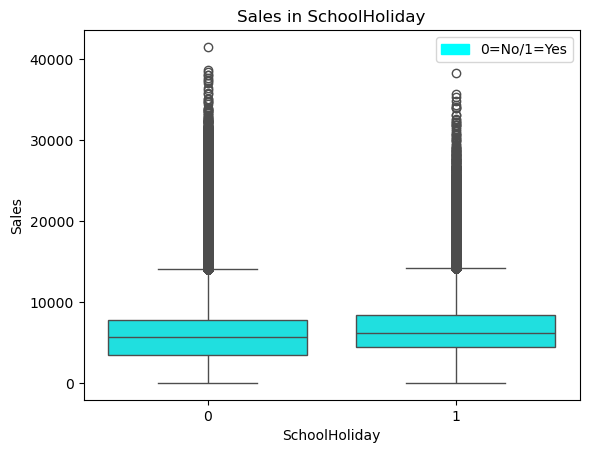

In [96]:
#Sales~SchoolHoliday
sns.boxplot(data=data, x='SchoolHoliday', y='Sales',color="cyan")
plt.title("Sales in SchoolHoliday")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=No/1=Yes")]
plt.legend(handles=custom_legend, title="")

In [ ]:
#Sales~StateHoliday
sns.boxplot(data=data, x='StateHoliday', y='Sales',color="cyan")
plt.title("Sales in StateHoliday")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Public Holiday/ b=Easter/ c=Christmas/0=None")]
plt.legend(handles=custom_legend, title="")

In [ ]:
#Daily Sales
sns.boxplot(data=data, x='DayOfWeek', y='Sales',color="cyan")
plt.title("Sales per Day")

In [ ]:
#Sales based on Promo and Promo2
fig,ax=plt.subplots(1, 2,figsize=(14, 6))
sns.boxplot(data=data,x='Promo',y='Sales',color="cyan",ax=ax[0])
ax[0].set_title("Sales With and Without Promo")
custom_legend_1=[Patch(color="cyan",label="0=No Promo/1=Promo")]
ax[0].legend(handles=custom_legend_1, title="")

sns.boxplot(data=data,x='Promo2',y='Sales',color="cyan",ax=ax[1])
ax[1].set_title("Sales With and Without Promo2")
custom_legend_2=[Patch(color="cyan",label="0=No Continuous Promo /1 = Continuous Promo")]
ax[1].legend(handles=custom_legend_2, title="")

plt.suptitle("Sales Based on Promo and Promo2", fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

In [ ]:
#Customers ~ Date
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by='Date')

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Date'],data['Customers'],color='blue')
plt.title("Customers per Day")
plt.xlabel("Date")
plt.ylabel("Customers")
plt.show()

In [ ]:
#Boxplot for customers~year
sns.boxplot(x='year',y='Customers',data=data,color="cyan")
plt.title('Customers per Year')
plt.xlabel('Year')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()

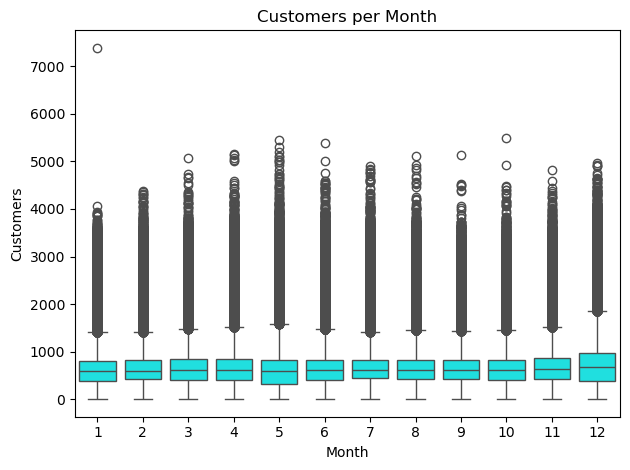

In [100]:
#Customers per month
sns.boxplot(x='month',y='Customers',data=data,color="cyan")
plt.title('Customers per Month')
plt.xlabel('Month')
plt.ylabel('Customers')
plt.tight_layout()

In [108]:
# Dates with most customers
top_customers=data.sort_values(by='Customers',ascending=False).head(5) 
print(top_customers[['Date', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',"Promo2","StoreType","Assortment","DayOfWeek","Store"]])

             Date  Customers Promo StateHoliday SchoolHoliday Promo2  \
993496 2013-01-22       7388     1            0             0      0   
319810 2014-10-03       5494     1            a             0      0   
101726 2015-05-01       5458     1            a             0      0   
432096 2014-06-09       5387     0            a             0      0   
444361 2014-05-29       5297     0            a             0      0   

       StoreType Assortment DayOfWeek  Store  
993496         a          a         2    817  
319810         b          a         5    262  
101726         b          a         5    262  
432096         b          a         1    262  
444361         b          a         4    262  


In [105]:
#Tables with frequencies for many customers
print(top_customers['Promo'].value_counts())
print(top_customers['StateHoliday'].value_counts())
print(top_customers['SchoolHoliday'].value_counts())
print(top_customers['Promo2'].value_counts())
print(top_customers['StoreType'].value_counts())
print(top_customers['Assortment'].value_counts())

Promo
0    6
1    4
Name: count, dtype: int64
StateHoliday
a    5
0    3
b    2
Name: count, dtype: int64
SchoolHoliday
0    9
1    1
Name: count, dtype: int64
Promo2
0    10
1     0
Name: count, dtype: int64
StoreType
b    9
a    1
Name: count, dtype: int64
Assortment
a    10
Name: count, dtype: int64


Text(0.5, 1.0, 'Customers per Day')

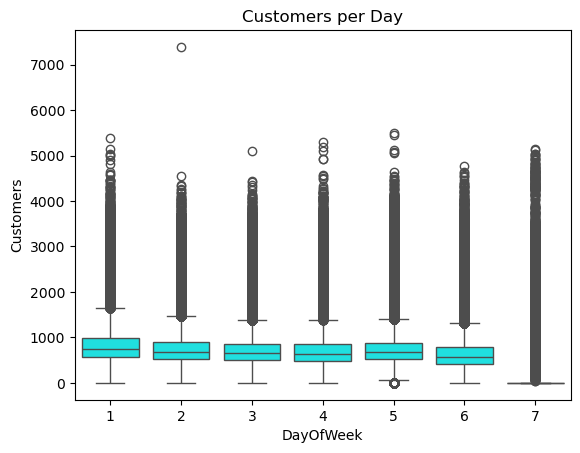

In [102]:
#Customers per day
sns.boxplot(data=data, x='DayOfWeek', y='Customers',color="cyan")
plt.title("Customers per Day")

## Multivariate Analysis with Plots for 3 Variables

In [ ]:
#Boxplot for sales per storetype and assortment
plt.figure(figsize=(15, 10))
sns.boxplot(x='StoreType', y='Sales', hue='Assortment', data=data, 
            palette={'a': 'blue', 'b': 'green', 'c': 'red'})
plt.title('Sales by StoreType and Assortment')
plt.xlabel('StoreType')
plt.ylabel('Sales')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, 
           labels=['Basic (a)',  'Extended (c)','Extra (b)'], 
           title='Assortment')
plt.show()

In [ ]:
#Boxplot for sales per storetype and Promo
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales',hue='Promo',data=data)
plt.title('Sales by StoreType and Promo')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Promo-> 0=NO & 1=YES')

In [ ]:
#Boxplot for sales per storetype and promo2
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales',hue='Promo2',data=data)
plt.title('Sales by StoreType and Promo2')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Promo2-> 0=NO & 1=YES')

In [ ]:
##Boxplot for sales by assortment and stateholiday
plt.figure(figsize=(10,6))
sns.barplot(x='Assortment', y='Sales',hue='StateHoliday',data=data)
plt.title('Sales by Assortment & StateHoliday')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.legend(title='StateHoliday')

In [ ]:
#Sales~Assortment & SchoolHoliday
plt.figure(figsize=(10,6))
sns.barplot(x='Assortment', y='Sales',hue='SchoolHoliday',data=data)
plt.title('Sales by Assortment & SchoolHoliday')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.legend(title='SchoolHoliday-> 0=No & 1=YES')

In [ ]:
#Sales~Storetype and stateholiday
plt.figure(figsize=(15,10))
sns.barplot(x='StoreType', y='Sales',hue='StateHoliday',data=data)
plt.title('Sales by StoreType and StateHoliday')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='StateHoliday->0=None/a=Public Holiday/b=Easter/ c=Christmas')

In [ ]:
#Sales~Storetype and schoolholiday
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Sales',hue='SchoolHoliday',data=data)
plt.title('Sales by StoreType and SchoolHoliday')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='SchoolHoliday')

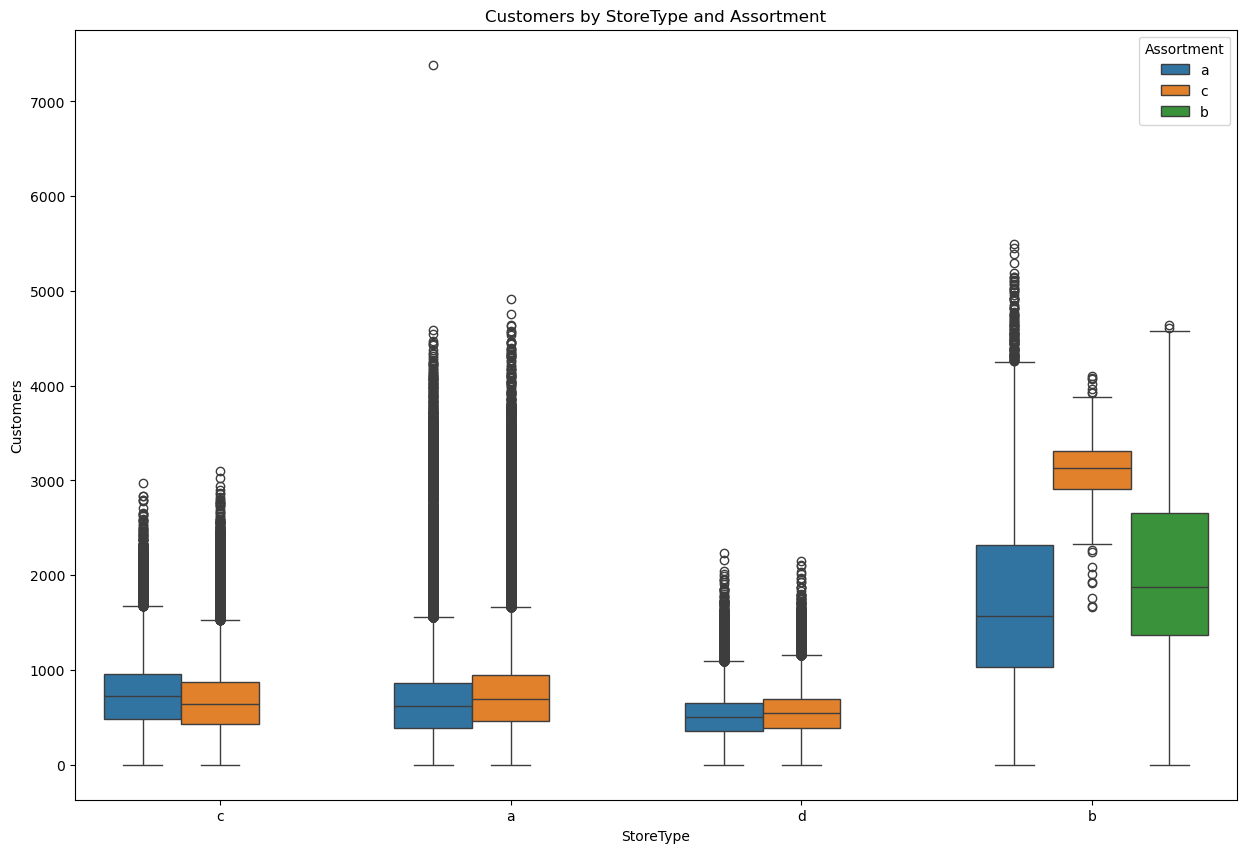

In [43]:
#Customers~Storetype and assortment
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Assortment',data=data)
plt.title('Customers by StoreType and Assortment')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Assortment')

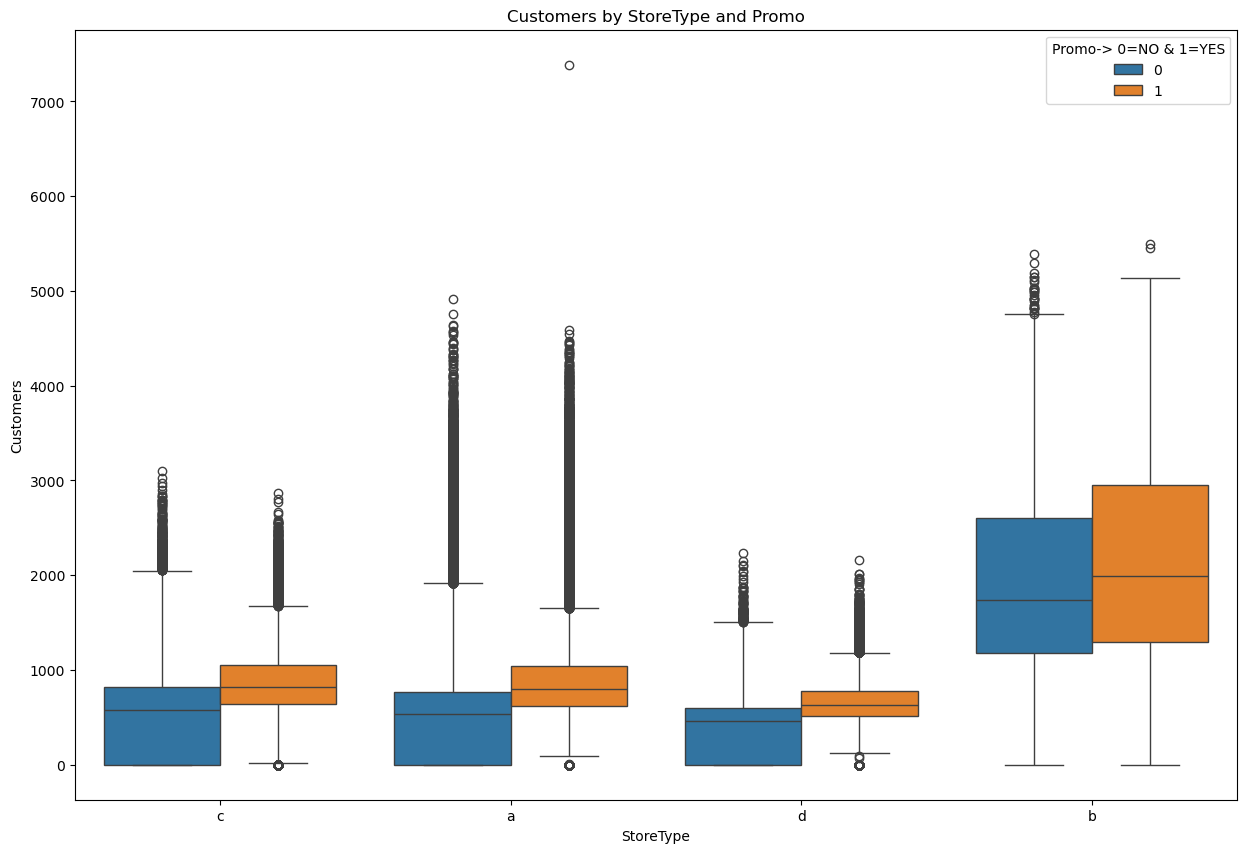

In [44]:
#Customers~Storetype and promo
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Promo',data=data)
plt.title('Customers by StoreType and Promo')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Promo-> 0=NO & 1=YES')

In [ ]:
#Customers~Storetype and promo2
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Promo2',data=data)
plt.title('Customers by StoreType and Promo2')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Promo2-> 0=NO & 1=YES')

In [ ]:
#Customers~Storetype and schoolholiday
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='SchoolHoliday',data=data)
plt.title('Customers by StoreType and SchoolHoliday')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='SchoolHoliday-> 0=NO & 1=YES')

In [ ]:
##Customers~Storetype and stateholiday
plt.figure(figsize=(15,10))
sns.barplot(x='StoreType', y='Customers',hue='StateHoliday',data=data)
plt.title('Customers by StoreType and StateHoliday')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title="StateHoliday-> a=Public Holiday/ b=Easter/ c=Christmas/0=None")

## Feature Engineering 
### PromotionFlags (Promo & Promo2) & HolidayIndicators (SchoolHoliday & StateHoliday)

In [19]:
#PromotionFlags
data['PromotionFlags']=((data['Promo']==1)|(data['Promo2']==1)).astype(int)
data["PromotionFlags"].value_counts() #check

PromotionFlags
1    703242
0    313967
Name: count, dtype: int64

In [20]:
# StateHoliday as a binary variable
data['StateHolidayIndicators']=data['StateHoliday'].apply(lambda x: 1 if str(x).strip() in ['a','b','c'] else 0).astype(int)
data['HolidayIndicators']=((data['StateHolidayIndicators']==1)|(data['SchoolHoliday']==1)).astype(int)
data["HolidayIndicators"].value_counts() #Check

HolidayIndicators
0    819949
1    197260
Name: count, dtype: int64

In [ ]:
#Boxplot for sales~PromotionFlags
sns.boxplot(x=data["PromotionFlags"],y="Sales",data=data)
plt.title('Sales with Promotion or not')
plt.legend(title="0=No promo / 1= Promo")

In [ ]:
#Sales For sales ~HolidayIndicators
sns.boxplot(y="Sales",x="HolidayIndicators",data=data)
plt.title('Sales in Holidays or not')
plt.legend(title="0=No Holidays/ 1= Holidays")

In [73]:
#Promo during Holiday
holiday_with_promo=data[(data['HolidayIndicators']==1)&(data['PromotionFlags']==1)].shape[0]
total_holidays=data[data['HolidayIndicators']==1].shape[0]
percentage_promo_during_holiday=((holiday_with_promo/total_holidays)*100) 

#Promo without holiday
non_holiday_with_promo=data[(data['HolidayIndicators']==0) &(data['PromotionFlags']==1)].shape[0]
total_non_holidays=data[data['HolidayIndicators']==0].shape[0]
percentage_promo_during_non_holiday=((non_holiday_with_promo/total_non_holidays) * 100) 

#results
print(f"Promo during Holiday:{percentage_promo_during_holiday:.2f}%")
print(f"Promo without Holiday:{percentage_promo_during_non_holiday:.2f}%")

Promo during Holiday:72.40%
Promo without Holiday:68.35%


In [21]:
#Feature Engineering for dates
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday
data['DayOfYear'] = data['Date'].dt.dayofyear
data['IsWeekend'] = data['Date'].dt.weekday >= 5
data['WeekOfYear'] = data['Date'].dt.isocalendar().week

In [22]:
data['IsWeekend'] = data['Date'].dt.weekday.astype(int)
data['HolidayIndicators'] = data['HolidayIndicators'].astype(int)
data['PromotionFlags'] = data['PromotionFlags'].astype(int)

# Time Series & Machine Learning Models

## Time Series -> ARIMA & Prophet

In [23]:
#Time Series 
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from prophet import Prophet
from pmdarima import auto_arima ,ARIMA, model_selection
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

In [24]:
#split the dataset in test & train
split_date = '2015-07-01'
train_data=data[data['Date']<split_date].copy()
test_data =data[data['Date']>=split_date].copy()

In [25]:
#check
print(train_data["Date"])
print(test_data["Date"])
train_data['Sales']=train_data['Sales'].astype(float)

34565     2015-06-30
34566     2015-06-30
34567     2015-06-30
34568     2015-06-30
34569     2015-06-30
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 982644, dtype: datetime64[ns]
0       2015-07-31
1       2015-07-31
2       2015-07-31
3       2015-07-31
4       2015-07-31
           ...    
34560   2015-07-01
34561   2015-07-01
34562   2015-07-01
34563   2015-07-01
34564   2015-07-01
Name: Date, Length: 34565, dtype: datetime64[ns]


In [26]:
#Rename Sales as y
data["Sales"]=data["Sales"].astype(float)
data=data.rename(columns={"Sales":"y"})

train_data["Sales"]=train_data["Sales"].astype(float)
train_data=train_data.rename(columns={"Sales":"y"})

test_data["Sales"]=test_data["Sales"].astype(float)
test_data=test_data.rename(columns={"Sales":"y"})

### Augmented Dickey Fuller Test for time series stationarity
### H0:Non Stationary Time series VS H1:Stationarity
### Non Stationary Time series -> Differencing Method

In [ ]:
#significance level
alpha = 0.05

#Data for every store
stores=data['Store'].drop_duplicates()
df_subsets={store:data[data['Store']==store] for store in stores}

#Dickey Fuller test ->H0:Non Stationary H1:Stationary 
for store, store_data in df_subsets.items():
    sales=store_data['y'] 
    result=adfuller(sales)
    p_value=result[1]
    
    # check
    if p_value > alpha:
        print(f"Store{store}: Non Stationary (p-value = {p_value}) Needs Differencing")
        sales_diff=sales.diff().dropna()  #Differencing method
        print(f"Differencing data for {store}:")
        print(sales_diff.head())
    else:
        print(f"Store {store}: Stationary (p-value = {p_value})")

In [ ]:
#ACF plot for Total sales in order to check seasonality
grouped_sales = data.groupby('Date')['y'].sum()
grouped_sales.index = pd.to_datetime(grouped_sales.index)
grouped_sales.sort_index(inplace=True)

#ACF plot for seasonality check
plot_acf(grouped_sales, lags=30)
plt.title('Autocorrelation of Total Sales')
plt.show()

In [ ]:
#Seasonality Check for train data
##There is seasonality beacause of the continuous pattern and the big spikes
plot_acf(train_data['y'],lags=30)
plt.show()

In [ ]:
#Seasonal decompose for store ID
#Second Method
my_series=data[data["Store"]==12]
result = seasonal_decompose(my_series['y'],period=7)
result.plot()

In [ ]:
#seasonality for a specific store
store_id = 543
store_data = train_data[train_data["Store"] == store_id].copy()
store_data["Date"] = pd.to_datetime(store_data["Date"])
store_data.set_index("Date", inplace=True)
store_data.sort_index(inplace=True)
plot_acf(store_data['y'], lags=30)
plt.title(f'Autocorrelation for Store {store_id}')
plt.show()

## ARIMA models for sales forecasting in StoreTypes A,B,C & D

In [28]:
n_periods=len(test)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=28775.966, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=28660.898, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=28626.610, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=30181.247, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=28777.952, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=28613.467, Time=0.41 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=28700.028, Time=0.25 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=28409.277, Time=0.97 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=28651.593, Time=0.59 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=28399.467, Time=1.38 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=28442.102, Time=1.05 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=28406.154, Time=1.72 sec
 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(0,0,2)(2,0,2)[7] interce

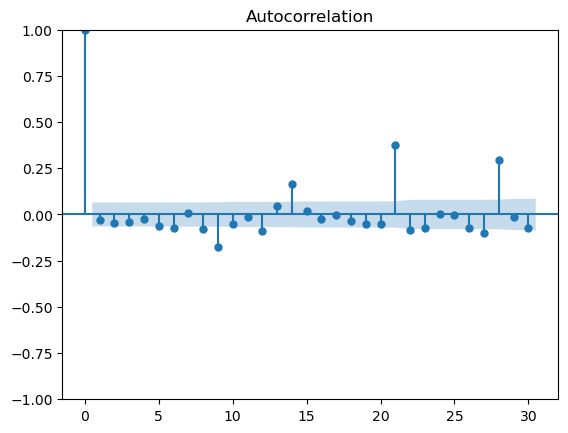

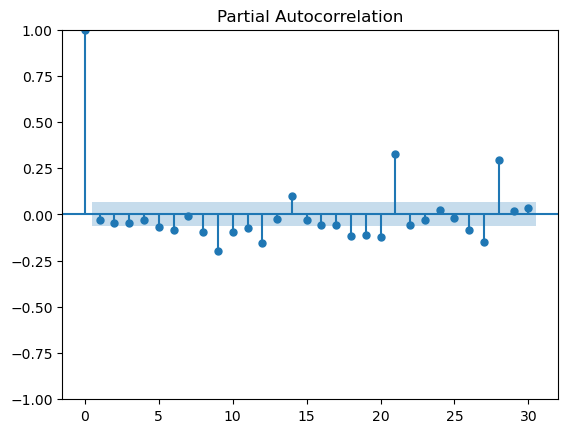

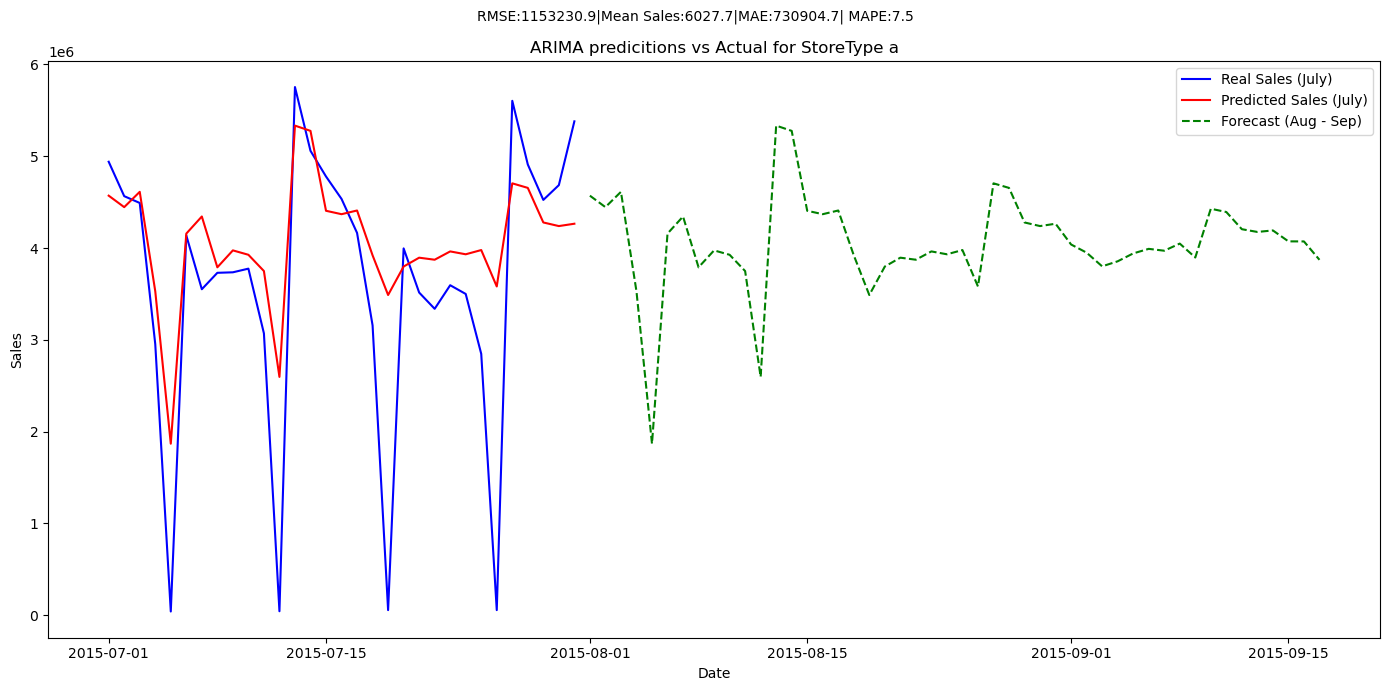

In [26]:
#ARIMA model for Store Types
#StoreType -> A
store_type='a'

#split data in test & train for storetype A
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#mean sales
test_store=test_data[test_data['StoreType'] == store_type]
mean_sales=test_store['y'].mean()

#ARIMA model
model_a=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_a.fit(train)
print(model_a.summary())

#Predicitions 
n_periods=len(test)
forecast_a=model_a.predict(n_periods=n_periods)
print(forecast_a)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_a.predict(n_periods=len(future_dates))

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_a
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_a.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(14,7))
plt.plot(test.index, y_real, label='Real Sales (July)', color='blue')
plt.plot(test.index, y_pred, label='Predicted Sales (July)', color='red')

#Predicitions for August & september
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|Mean Sales:{mean_sales:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
#mean sales for b
test_store=test_data[test_data['StoreType'] == 'b']
mean_sales=test_store['y'].mean()
print(mean_sales)

10874.925996204933


In [27]:
#ARIMA model for Store Types
#StoreType -> B
store_type='b'

#split data in test & train for storetype B
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_b=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_b.fit(train)
print(model_b.summary())

#Predicitions for next month
forecast_b=model_b.predict(n_periods=n_periods)
print(forecast_b)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_b.predict(n_periods=len(future_dates))

#mean sales
test_store=test_data[test_data['StoreType'] == store_type]
mean_sales=test_store['y'].mean()

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_b
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_b.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|Mean Sales:{mean_sales:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=20569.689, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=21484.520, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=20903.718, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=21063.449, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=21482.541, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=21087.009, Time=0.54 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=20788.572, Time=0.54 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=20544.046, Time=4.31 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=20613.247, Time=2.30 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=20534.395, Time=5.40 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=20554.290, Time=5.12 sec
 ARIMA(1,1,2)(2,0,2)[7] intercept   : AIC=20562.595, Time=7.48 sec
 ARIMA(2,1,1)(2,0,2)[7] intercept   : AIC=20584.185, Time=4.11 sec
 ARIMA(3,1,2)(2,0,2)[7] intercept   : AIC=20533.406, Time=10.33 sec
 ARIMA(3,1,2)(1,0,

NameError: name 'n_periods' is not defined

In [31]:
#mean sales for b
test_store=test_data[test_data['StoreType'] == 'c']
mean_sales=test_store['y'].mean()
print(mean_sales)

6066.334132519616


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=26208.230, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=26119.746, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=26074.295, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=27631.777, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=26201.734, Time=0.05 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=26068.349, Time=0.50 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=26161.157, Time=0.26 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=25856.829, Time=0.81 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=26112.415, Time=0.60 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=25844.400, Time=1.06 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=25887.863, Time=0.87 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=25845.987, Time=1.08 sec
 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=2.65 sec
 ARIMA(0,0,2)(2,0,2)[7] interce

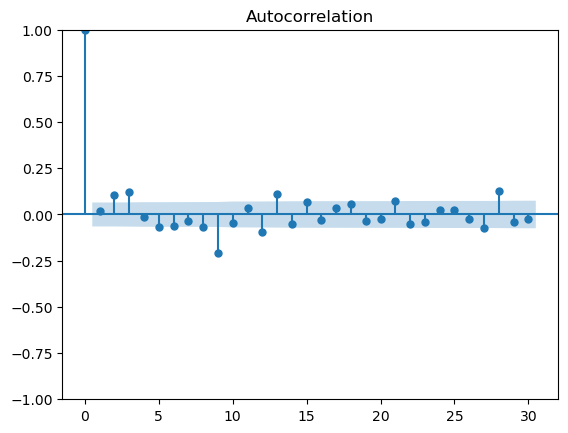

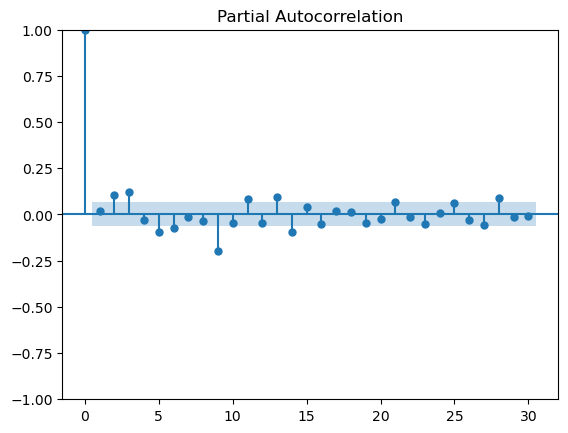

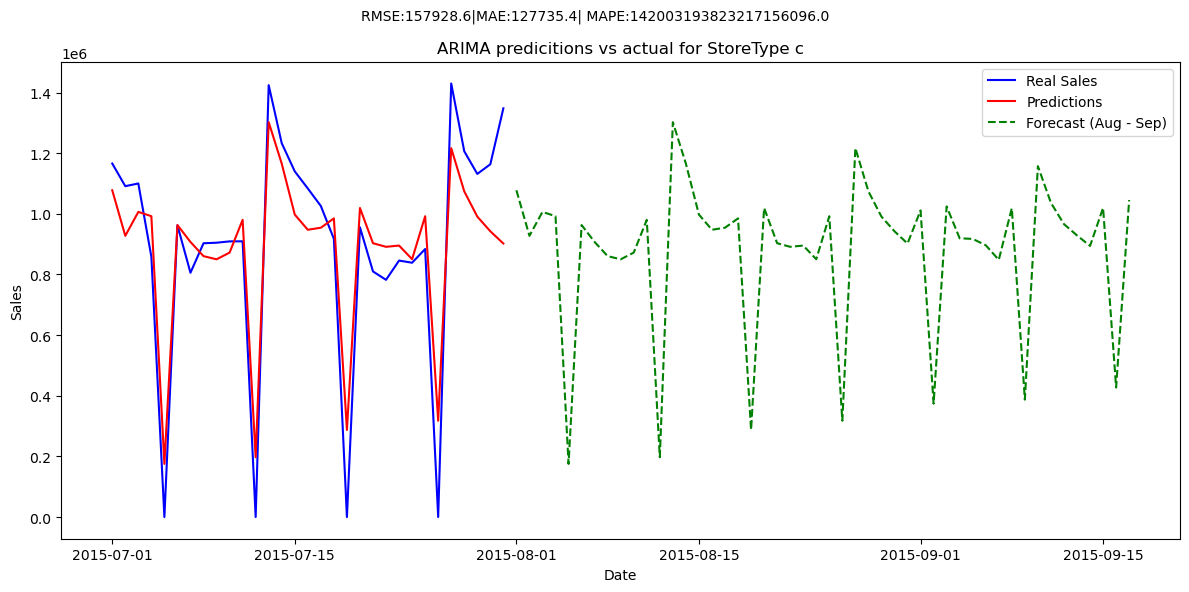

In [26]:
#ARIMA model for Store Types
#StoreType -> C
store_type='c'

#split data in test & train for storetype C
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_c=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_c.fit(train)
print(model_c.summary())

#Predicitions for next month
forecast_c=model_c.predict(n_periods=n_periods)
print(forecast_c)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_c.predict(n_periods=len(future_dates))

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_c
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_c.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=27727.064, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=27643.176, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=27605.681, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=29117.580, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=27724.087, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=27600.264, Time=0.52 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=27682.184, Time=0.25 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=27386.687, Time=0.91 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=27625.946, Time=0.63 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=27377.457, Time=1.27 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=27419.191, Time=0.95 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=27377.347, Time=2.55 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=27418.038, Time=1.07 sec
 ARIMA(0,0,0)(2,0,1)[7] i

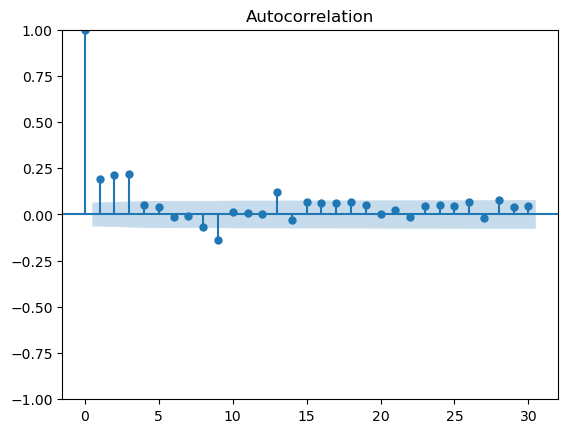

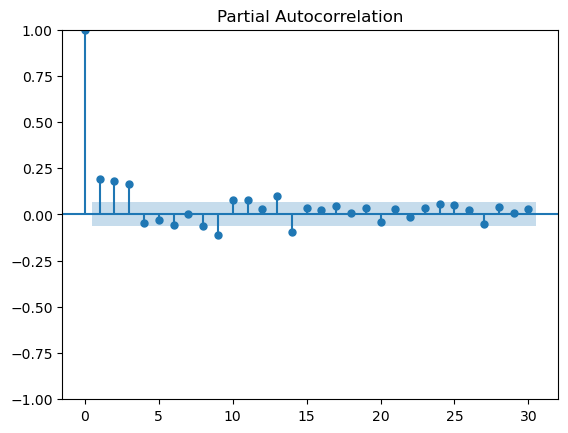

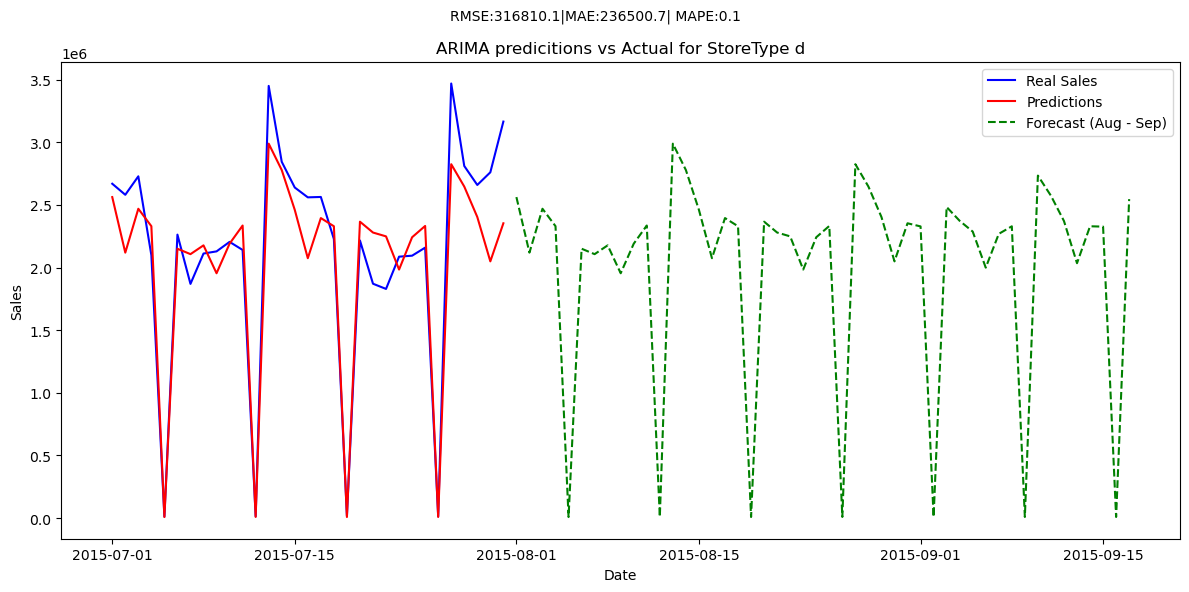

In [27]:
#ARIMA model for Store Types
#StoreType -> D
store_type='d'

#split data in test & train for storetype D
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_d=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_d.fit(train)
print(model_d.summary())

#Predicitions for next month
forecast_d=model_d.predict(n_periods=n_periods)
print(forecast_d)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_d.predict(n_periods=len(future_dates))

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_d
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_d.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

## ARIMA models for Stores sales forecasting

In [34]:
#Total sales per stores
store_sales=data.groupby('Store')['y'].sum()

#Store with most sales
top_store=store_sales.idxmax()
top_sales=store_sales.max()

#Store with least sales
bottom_store=store_sales.idxmin()
bottom_sales=store_sales.min()

print(f"Store with most sales is: {top_store} with total sales{top_sales}")
print(f"Store with least sales is: {bottom_store} with total sales {bottom_sales}")

print("Top 5 stores with most sales:")
print(store_sales.sort_values(ascending=False).head(5))

print("Top 5 Stores with lowest sales:")
print(store_sales.sort_values(ascending=True).head(5))

Store with most sales is: 262 with total sales19516842.0
Store with least sales is: 307 with total sales 2114322.0
Top 5 stores with most sales:
Store
262     19516842.0
817     17057867.0
562     16927322.0
1114    16202585.0
251     14896870.0
Name: y, dtype: float64
Top 5 Stores with lowest sales:
Store
307    2114322.0
543    2179287.0
198    2268273.0
208    2302052.0
263    2306075.0
Name: y, dtype: float64


In [56]:
#mean sales for stores
test_store=test_data[test_data['Store'] == 2]
mean_sales=test_store['y'].mean()
print(mean_sales)

4315.0


163
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  911
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 7)   Log Likelihood               -8167.794
Date:                             Fri, 23 May 2025   AIC                          16347.588
Time:                                     14:33:36   BIC                          16376.469
Sample:                                 01-01-2013   HQIC                         16358.615
                                      - 06-30-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    144.1402     33.683      4.279      0.000      78.122     210.158
ar.L1         -0.6779  

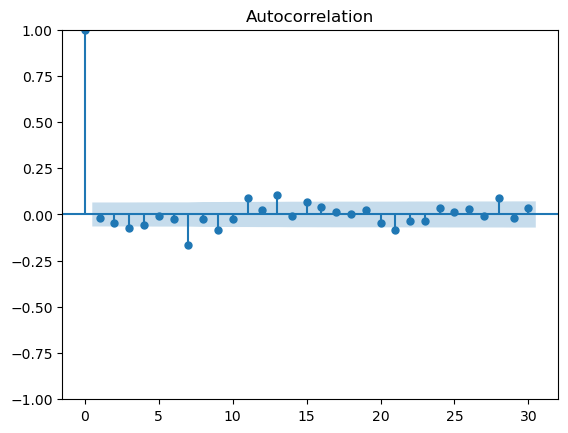

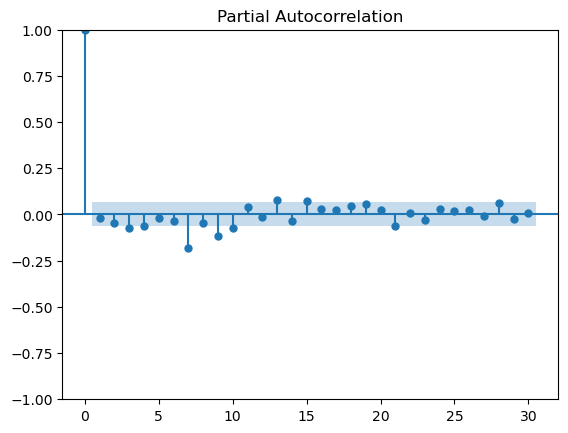

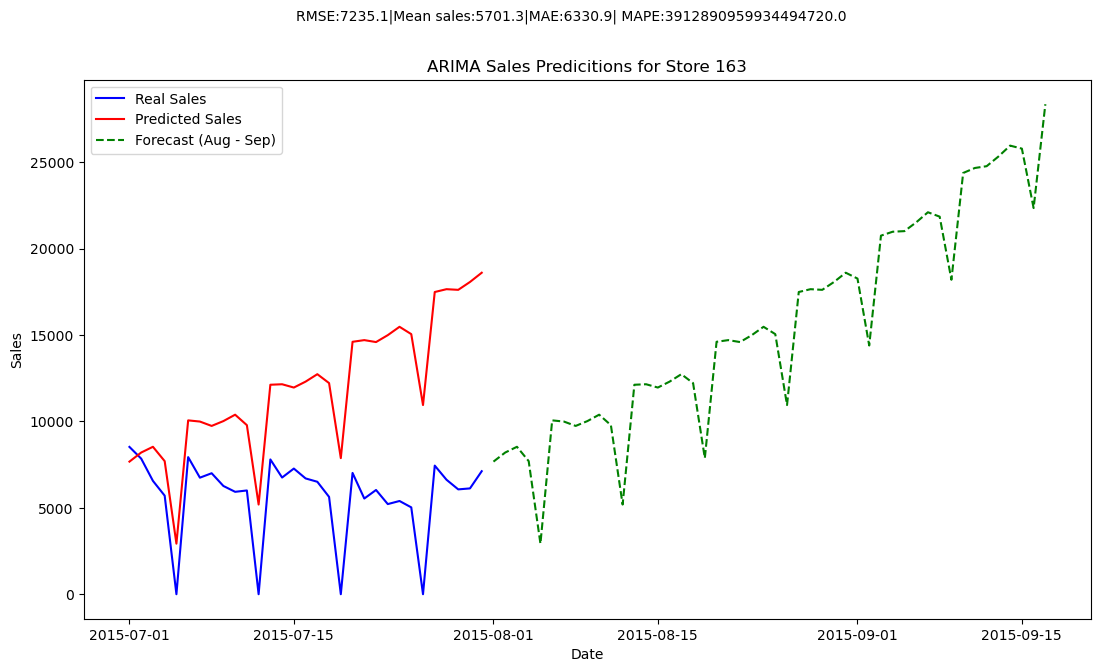

In [110]:
#Arima model for one store at a time
Store_ID=163
#Store_ID=np.random.choice(range(1,data["Store"].max()))   #OR Store_ID=... for a specific store 
print(Store_ID)

#Train & Test data
train_store=train_data[train_data["Store"]==Store_ID].copy()
test_store=test_data[test_data["Store"]==Store_ID].copy()
train_store["Date"]=pd.to_datetime(train_store["Date"])
test_store["Date"]=pd.to_datetime(test_store["Date"])
train_store.set_index("Date",inplace=True)
test_store.set_index("Date",inplace=True)
train_store.sort_index(inplace=True)
test_store.sort_index(inplace=True)

#mean sales
mean_sales=test_store['y'].mean()

##Arima with seasonality and data for every day
model=auto_arima(train_store["y"],seasonal=True, m=7,trace=False,suppress_warnings=False,stepwise=True)
print(model.summary())

#Predictions
prediction_arima=model.predict(n_periods=n_periods)
#prediction_arima[prediction_arima<0]=0
print(prediction_arima)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01',end='2015-09-17')
forecast_future = model.predict(n_periods=len(future_dates))

#Model Fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
rmse=np.sqrt(mean_squared_error(test_store["y"],prediction_arima))
mae=mean_absolute_error(test_store["y"],prediction_arima)
mape=mean_absolute_percentage_error(test_store["y"],prediction_arima)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#Plot predictions vs real sales
plt.figure(figsize=(13,7))
plt.plot(test_store.index,test_store["y"],label="Real Sales", color='blue')
plt.plot(test_store.index,prediction_arima,label="Predicted Sales",color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"ARIMA Sales Predicitions for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|Mean sales:{mean_sales:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.show()

In [ ]:
#Arima model for store 543 with seasonality every 14 days
Store_ID=543
print(Store_ID)

#Train & Test data
train_store=train_data[train_data["Store"]==Store_ID].copy()
test_store=test_data[test_data["Store"]==Store_ID].copy()
train_store["Date"]=pd.to_datetime(train_store["Date"])
test_store["Date"]=pd.to_datetime(test_store["Date"])
train_store.set_index("Date",inplace=True)
test_store.set_index("Date",inplace=True)
train_store.sort_index(inplace=True)
test_store.sort_index(inplace=True)

#mean sales
mean_sales=test_store['y'].mean()

##Arima with seasonality and data for every day
model=auto_arima(train_store["y"],seasonal=True, m=14,trace=False,suppress_warnings=False,stepwise=True)
print(model.summary())

#Predictions
prediction_arima=model.predict(n_periods=n_periods)
#prediction_arima[prediction_arima<0]=0
print(prediction_arima)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01',end='2015-09-17')
forecast_future = model.predict(n_periods=len(future_dates))

#Model Fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
rmse=np.sqrt(mean_squared_error(test_store["y"],prediction_arima))
mae=mean_absolute_error(test_store["y"],prediction_arima)
mape=mean_absolute_percentage_error(test_store["y"],prediction_arima)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#Plot predictions vs real sales
plt.figure(figsize=(13,7))
plt.plot(test_store.index,test_store["y"],label="Real Sales", color='blue')
plt.plot(test_store.index,prediction_arima,label="Predicted Sales",color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"ARIMA Sales Predicitions for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|Mean sales:{mean_sales:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.show()

## ARIMA models for store sales forecasting with specific characteristics like PromotionFlags & StoreTypes


In [ ]:
#Arima for Stores with different characteristics (PromotionFlags& StoreTypes)
PROMO_FLAG=1 #0->No & 1->Yes
STORE_TYPE='a'  #a,b,c or d

#Data with the above information
selected_stores=data.copy()
if PROMO_FLAG is not None:
    selected_stores=selected_stores[selected_stores["PromotionFlags"]==PROMO_FLAG]

if STORE_TYPE is not None:
    selected_stores=selected_stores[selected_stores["StoreType"]==STORE_TYPE]

#Random Store
stores=selected_stores["Store"].unique()
Store_ID=np.random.choice(stores)
print(Store_ID)

#test & train data
store_data=data[data["Store"]==Store_ID].copy()
store_data["Date"]=pd.to_datetime(store_data["Date"])
store_data=store_data.sort_values("Date")
store_data.set_index("Date",inplace=True)
split_date='2015-07-01'
train_store=store_data[store_data.index<split_date]
test_store=store_data[store_data.index>=split_date]

#ARIMA model
model_new=auto_arima(train_store["y"],seasonal=True,m=7,trace=False,suppress_warnings=False,stepwise=True)
print(model_new.summary())

#Predictions
pred=model_new.predict(n_periods=n_periods)
#pred[pred<0]=0
print(pred)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_new.predict(n_periods=len(future_dates))

#Statistics for model fit
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
rmse=np.sqrt(mean_squared_error(test_store["y"],pred))
mae=mean_absolute_error(test_store["y"],pred)
mape=mean_absolute_percentage_error(test_store["y"],pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_new.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#plot for real vs predicted values
plt.figure(figsize=(14,7))
plt.plot(test_store.index,test_store["y"],label="Actual Sales",color='blue')
plt.plot(test_store.index,pred,label="Predictions",color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"Predictions for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.show()

163
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  911
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 7)   Log Likelihood               -1785.922
Date:                            Fri, 23 May 2025   AIC                           3583.843
Time:                                    14:46:14   BIC                           3612.730
Sample:                                01-01-2013   HQIC                          3594.872
                                     - 06-30-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4617      0.450      3.246      0.001       0.579       2.344
ar.L1         -0.9205      0.03

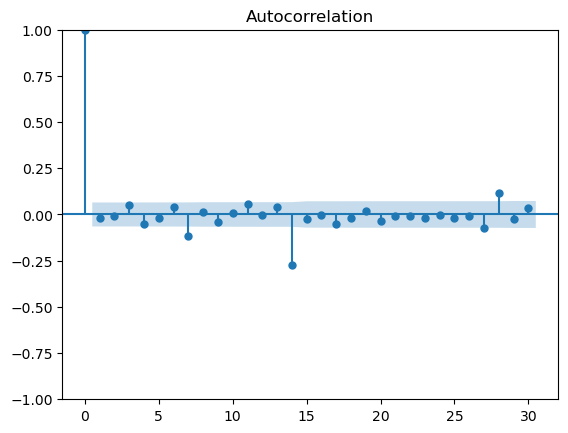

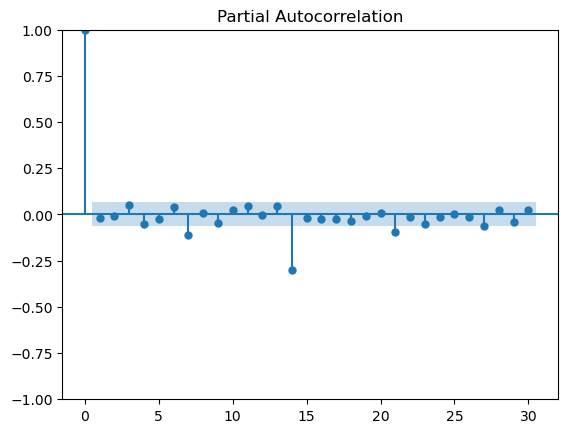

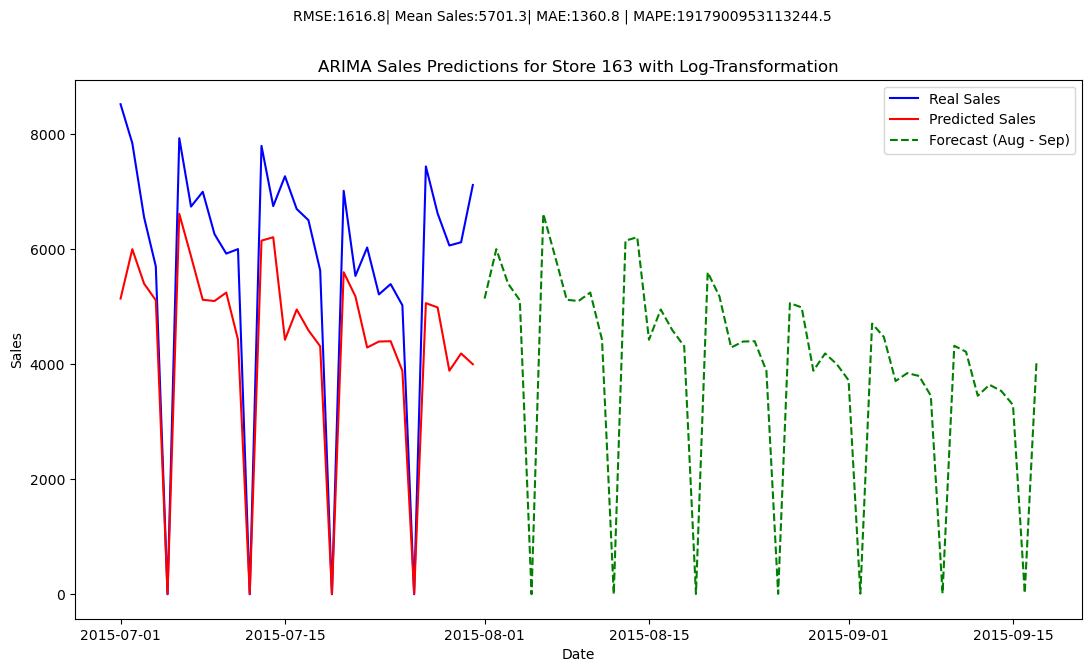

In [118]:
##model with log tranformation
Store_ID = 163
print(Store_ID)

#Data
train_store = train_data[train_data["Store"] == Store_ID].copy()
test_store = test_data[test_data["Store"] == Store_ID].copy()
train_store["Date"] = pd.to_datetime(train_store["Date"])
test_store["Date"] = pd.to_datetime(test_store["Date"])
train_store.set_index("Date", inplace=True)
test_store.set_index("Date", inplace=True)
train_store.sort_index(inplace=True)
test_store.sort_index(inplace=True)

#mean sales
mean_sales=test_store['y'].mean()

#Log transformation
train_store["y_log"] = np.log1p(train_store["y"])  # log(1 + y)

#model
model = auto_arima(train_store["y_log"], seasonal=True, m=7, trace=False, suppress_warnings=False, stepwise=True)
print(model.summary())

# Predictions
n_periods = len(test_store)
pred_log = model.predict(n_periods=n_periods)
prediction_arima = np.expm1(pred_log)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_log_future = model.predict(n_periods=len(future_dates))
forecast_future = np.expm1(forecast_log_future)

#Evaluation Metrics
rmse = np.sqrt(mean_squared_error(test_store["y"], prediction_arima))
mae = mean_absolute_error(test_store["y"], prediction_arima)
mape = mean_absolute_percentage_error(test_store["y"], prediction_arima)
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"MAE: {mae:.2f}")

#Residuals
resid = pd.Series(model.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#Plots
plt.figure(figsize=(13, 7))
plt.plot(test_store.index, test_store["y"], label="Real Sales", color='blue')
plt.plot(test_store.index, prediction_arima, label="Predicted Sales", color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"ARIMA Sales Predictions for Store {Store_ID} with Log-Transformation")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}| Mean Sales:{mean_sales:.1f}| MAE:{mae:.1f} | MAPE:{mape:.1f}", fontsize=10)
plt.legend()
plt.show()

In [ ]:
##model with log tranformation for store 543
Store_ID = 543
print(Store_ID)

#Data
train_store = train_data[train_data["Store"] == Store_ID].copy()
test_store = test_data[test_data["Store"] == Store_ID].copy()
train_store["Date"] = pd.to_datetime(train_store["Date"])
test_store["Date"] = pd.to_datetime(test_store["Date"])
train_store.set_index("Date", inplace=True)
test_store.set_index("Date", inplace=True)
train_store.sort_index(inplace=True)
test_store.sort_index(inplace=True)

#mean sales
mean_sales=test_store['y'].mean()

#Log transformation
train_store["y_log"] = np.log1p(train_store["y"])  # log(1 + y)

#model
model = auto_arima(train_store["y_log"], seasonal=True, m=14, trace=False, suppress_warnings=False, stepwise=True)
print(model.summary())

# Predictions
n_periods = len(test_store)
pred_log = model.predict(n_periods=n_periods)
prediction_arima = np.expm1(pred_log)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_log_future = model.predict(n_periods=len(future_dates))
forecast_future = np.expm1(forecast_log_future)

#Evaluation Metrics
rmse = np.sqrt(mean_squared_error(test_store["y"], prediction_arima))
mae = mean_absolute_error(test_store["y"], prediction_arima)
mape = mean_absolute_percentage_error(test_store["y"], prediction_arima)
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"MAE: {mae:.2f}")

#Residuals
resid = pd.Series(model.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#Plots
plt.figure(figsize=(13, 7))
plt.plot(test_store.index, test_store["y"], label="Real Sales", color='blue')
plt.plot(test_store.index, prediction_arima, label="Predicted Sales", color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"ARIMA Sales Predictions for Store {Store_ID} with Log-Transformation")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}| Mean Sales:{mean_sales:.1f}| MAE:{mae:.1f} | MAPE:{mape:.1f}", fontsize=10)
plt.legend()
plt.show()

## PROPHET

In [27]:
#Dataframe for holidays and date
state_dates=train_data[(train_data.StateHoliday=='a')|(train_data.StateHoliday=='b')|(train_data.StateHoliday=='c')].loc[:,'Date'].values
school_dates=train_data[train_data.SchoolHoliday==1].loc[:,'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays=pd.concat((state,school))      
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


In [ ]:
#Prophet model

Store_ID= 163
#Random Store
#Store_ID=np.random.choice(range(1,train_data["Store"].max())) #OR Store_ID=... for a specific store
print(Store_ID)

store_data = data[data["Store"] == Store_ID].copy()
store_data['ds'] = pd.to_datetime(store_data['Date'])
store_data['y'] = store_data['y']

# Split store data into train and test based on 'ds'
train_df=store_data[store_data['ds']<split_date].copy()
test_df=store_data[store_data['ds']>= split_date].copy()

#mean sales
mean_sales=test_df['y'].mean()

##Columns that we will use in the regressors
sel=['ds','y','PromotionFlags']
train_df=train_df[sel]
test_df=test_df[sel]

#Model
m=Prophet(holidays=holidays)
m.add_regressor("PromotionFlags")
#m.add_regressor("CompetitionDistance") #IT RETURNS NEGATIVE PREDICITIONS BECAUSE OF THE OUTLIERS
#m.add_regressor("Customers") #IT RETURNS NEGATIVE PREDICTIONS BECAUSE OF THE OUTLIERS
m.fit(train_df)

#Future dataframe for next 31 days
future=m.make_future_dataframe(periods=31, freq='D')

#Merge with current data
future=future.merge(store_data[['ds','PromotionFlags']],on='ds',how='left')
future['PromotionFlags'].fillna(1, inplace=True)  #With promotion because most stores have promo

#Predictions
forecast=m.predict(future)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())

# Forecast for Future Dates (Aug - Mid Sep) 
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
future_ext = pd.DataFrame({'ds': future_dates})
future_ext = future_ext.merge(store_data[['ds', 'PromotionFlags']], on='ds', how='left')
future_ext['PromotionFlags'].fillna(1, inplace=True)
#predictions
forecast_future = m.predict(future_ext)


#Model fit with some statistics
merged=pd.merge(test_df[['ds','y']],forecast[['ds','yhat']],on='ds',how='inner')
r2=r2_score(merged['y'],merged['yhat'])
rmse=np.sqrt(mean_squared_error(merged['y'],merged['yhat']))
mape=mean_absolute_percentage_error(merged['y'],merged['yhat'])
mae=mean_absolute_error(merged["y"],merged["yhat"])
print(f"R_squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE:{mae:.2f}")

#Plot real vs predicted values
plt.figure(figsize=(14,7))
plt.plot(merged['ds'],merged['y'],label='Actual Sales',color='blue')
plt.plot(merged['ds'],merged['yhat'],label='Predicted Sales',color='red')
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast (Aug - Mid Sep)', color='green', linestyle='--')
plt.title(f"Prophet Predictions vs Actual Sales for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|Mean Sales:{mean_sales:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}|R_squared:{r2:.1f}",fontsize=10)
plt.legend()
plt.show()

In [ ]:
#Store types for stores
store_no=543
store_type=data.loc[data["Store"]==store_no, "StoreType"].iloc[0]
print(f"Store {store_no} - Type {store_type}")

Store 543 - Type c


In [84]:
store_id=543
storedf=data[data["Store"]==store_id]
storedf["Open"] = storedf["Open"].astype(int)
total_days=len(storedf)
open_days=storedf["Open"].sum()
closed_days=total_days-open_days

open_pct=open_days/total_days*100
closed_pct=closed_days/total_days*100

print(f"Open: {open_days} days ({open_pct:.1f}%)")
print(f"Closed: {closed_days} days ({closed_pct:.1f}%)")

Open: 781 days (82.9%)
Closed: 161 days (17.1%)


In [ ]:
#Prophet model for stores with different characteristics
PROMO_FLAG=1
STORE_TYPE='b'

#Data with the above information
filtered_data=data.copy()
if PROMO_FLAG is not None:
    filtered_data=filtered_data[filtered_data["PromotionFlags"]==PROMO_FLAG]
if STORE_TYPE is not None:
    filtered_data=filtered_data[filtered_data["StoreType"]==STORE_TYPE]

#Random Selection
stores=filtered_data["Store"].unique()
Store_ID=np.random.choice(stores)
print(Store_ID)

#TEST & TRAIN DATA
store_data=data[data["Store"]==Store_ID].copy()
store_data["ds"]=pd.to_datetime(store_data["Date"])
store_data=store_data[["ds","y","PromotionFlags"]].copy()
train_df=store_data[store_data["ds"]<split_date].copy()
test_df=store_data[store_data["ds"]>=split_date].copy()

#Model
m_new=Prophet(holidays=holidays)
m_new.add_regressor("PromotionFlags")
m_new.fit(train_df)

#Future dataframe
future=m_new.make_future_dataframe(periods=31, freq='D')
future=future.merge(store_data[["ds","PromotionFlags"]],on="ds",how="left")
future["PromotionFlags"].fillna(1,inplace=True)  # with promo

#Predicitions
forecast=m_new.predict(future)

# Forecast for Future Dates (Aug - Mid Sep) 
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
future_ext = pd.DataFrame({'ds': future_dates})
future_ext = future_ext.merge(store_data[['ds', 'PromotionFlags']], on='ds', how='left')
future_ext['PromotionFlags'].fillna(1, inplace=True)
#predictions
forecast_future = m_new.predict(future_ext)

#Model fit
merged=pd.merge(test_df[["ds", "y"]], forecast[["ds","yhat"]],on="ds",how="inner")
rmse=np.sqrt(mean_squared_error(merged["y"],merged["yhat"]))
mape=mean_absolute_percentage_error(merged["y"],merged["yhat"])
mae= mean_absolute_error(merged["y"],merged["yhat"])
r2=r2_score(merged["y"], merged["yhat"])
print(f"R2:{r2:.2f}")
print(f"RMSE:{rmse:.2f}")
print(f"MAPE:{mape:.2%}")
print(f"MAE:{mae:.2f}")

#Plot
plt.figure(figsize=(14,7))
plt.plot(merged["ds"],merged["y"],label="Actual Sales",color="blue")
plt.plot(merged["ds"],merged["yhat"],label="Predicted Sales",color="red")
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast (Aug - Mid Sep)', color='orange', linestyle='--')
plt.title(f"Prophet Predictions vs Actual Sales for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}|R_squared:{r2:.1f}",fontsize=10)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#log transformation with prophet
# Store
Store_ID=163

#Data
train_store=train_data[train_data["Store"]==Store_ID][["Date", "y"]].copy()
test_store=test_data[test_data["Store"]==Store_ID][["Date", "y"]].copy()

#Log transformation
train_store = train_store.rename(columns={"Date": "ds"})
train_store["y"] = np.log1p(train_store["y"])

#model
model=Prophet(holidays=holidays)
model.fit(train_store)

#Forecast
future= pd.date_range(start=test_store["Date"].min(), end='2015-09-17')
future_df = pd.DataFrame({"ds": future})
forecast = model.predict(future_df)
forecast["yhat_exp"] = np.expm1(forecast["yhat"])

#Evaluation
test_store= test_store.set_index("Date")
pred_test= forecast.set_index("ds").loc[test_store.index]["yhat_exp"]
rmse = np.sqrt(mean_squared_error(test_store["y"], pred_test))
mae = mean_absolute_error(test_store["y"], pred_test)
mape = mean_absolute_percentage_error(test_store["y"], pred_test)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2%}")

#Plot
plt.figure(figsize=(13, 7))
plt.plot(test_store.index, test_store["y"], label="Real Sales", color="blue")
plt.plot(test_store.index, pred_test, label="Predicted Sales", color="red")
plt.plot(forecast["ds"], forecast["yhat_exp"], label="Forecast", color="green", linestyle="--")
plt.title(f"Prophet Sales Forecast for Store {Store_ID} with Log-Transformation")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}|R_squared:{r2:.1f}",fontsize=10)
plt.legend()
plt.show()

In [85]:
#July data to check why there are somde deviations in real vs predicted values
# Store
store_id=543
#data for july 
july_data=data[(data['Store']==store_id)&(data['Date']>='2015-07-01') & (data['Date']<='2015-07-31')].copy()
july_data['Date']=pd.to_datetime(july_data['Date'])

#Results
print(july_data["Promo"].value_counts())
print(july_data["Promo2"].value_counts())
print(july_data["StateHoliday"].value_counts())
print(july_data["SchoolHoliday"].value_counts())

Promo
0    18
1    13
Name: count, dtype: int64
Promo2
0    31
1     0
Name: count, dtype: int64
StateHoliday
0    31
Name: count, dtype: int64
SchoolHoliday
0    26
1     5
Name: count, dtype: int64


In [91]:
#July data to check why there are somde deviations in real vs predicted values
# Store
store_id=262
#data for july 
july_data=data[(data['Store']==store_id)&(data['Date']>='2015-07-01') & (data['Date']<='2015-07-31')].copy()
july_data['Date']=pd.to_datetime(july_data['Date'])

#Results
print(july_data["Promo"].value_counts())
print(july_data["Promo2"].value_counts())
print(july_data["StateHoliday"].value_counts())
print(july_data["SchoolHoliday"].value_counts())

Promo
0    18
1    13
Name: count, dtype: int64
Promo2
0    31
1     0
Name: count, dtype: int64
StateHoliday
0    31
Name: count, dtype: int64
SchoolHoliday
0    19
1    12
Name: count, dtype: int64


## Machine Learning Models -> LightGBM & XGBoost

In [28]:
#Machine Learning models LightGBM & XGBoost
#Libraries
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from lightgbm import early_stopping, log_evaluation
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import shap

In [29]:
#Preparation for models
target='y'
cols=['y','Date',"StateHolidayIndicators","PromotionFlags","day","year","month","HolidayIndicators","Customers"] 
X_train=train_data.drop(columns=cols)
y_train=train_data[target]
X_test=test_data.drop(columns=cols)
y_test=test_data[target]
X_train,y_train=shuffle(X_train, y_train, random_state=42)

cat_cols=['StoreType','Assortment','PromoInterval',"Promo","Promo2","StateHoliday","SchoolHoliday"]
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [31]:
#Hyperparameter tuning 
param_grid= {
    'num_leaves':[5],
    'learning_rate': [0.05,0.1],
    'n_estimators':[50,100],
    'max_depth':[3, 5, 7],
    'min_data_in_leaf':[10,20]
}

#LightGBM Regressor
lgb_regressor=lgb.LGBMRegressor(objective='regression', boosting_type='gbdt')

#Grid search
grid_search=GridSearchCV(
    estimator=lgb_regressor,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  #negative RMSE 
    cv=5
)

#model train
grid_search.fit(X_train, y_train)

#Best hyperparameters
best_params = grid_search.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())
print("Best Hyperparameters:", best_params)
print("Best RMSE Score:", -grid_search.best_score_)  # negative score beacuse it is negative RMSE

KeyboardInterrupt: 

In [30]:
#Model Parameters
par={
    'metric':'rmse',
    'boosting_type':'gbdt',
    'num_leaves':5,
    'learning_rate':0.1,
    "n_estimators":100,
    'max_depth': 5,
    'min_data_in_leaf':10,
    'verbose':-1,
    "objective":"regression_l2",
}

In [31]:
#Model with all the variables
model_lgbm=LGBMRegressor(**par)
model_lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 2166.71
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 2166.71


LGBMRegressor(max_depth=5, metric='rmse', min_data_in_leaf=10, num_leaves=5,
              objective='regression_l2', verbose=-1)

In [ ]:
#SHAP
explainer=shap.Explainer(model_lgbm)
#SHap values for x_test
shap_values = explainer(X_test)
#plot
shap.summary_plot(shap_values, X_test)

In [32]:
#Predictions
y_pred_lgbm=model_lgbm.predict(X_test)

#Statistics for model fit
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lgbm))
mae=mean_absolute_error(y_test,y_pred_lgbm)
mape=mean_absolute_percentage_error(y_test,y_pred_lgbm)
#r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred_lgbm)
#Results
print(f"RMSE:{rmse:.1f}")
print(f"MAE:{mae:.1f}")
print(f"MAPE:{mape:.1f}")
#print(f"R²:{r2:.1f}")
print(f"MSE:{mse:.1f}")

RMSE:2166.7
MAE:1515.7
MAPE:155111843489258112.0
MSE:4694648.9


In [35]:
#CROSS VALIDATION CHECK for full model
cv_scores=cross_val_score(model_lgbm,X_train,y_train,cv=5,scoring='neg_root_mean_squared_error')

#RESULTS
print("Cross-Validation RMSE Scores fo full LGBM Model:",-cv_scores)
print("Mean RMSE:",-np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

Cross-Validation RMSE Scores fo full LGBM Model: [2181.0009855  2206.93233076 2210.23693674 2211.92719604 2198.43459227]
Mean RMSE: 2201.7064082614465
Standard Deviation of RMSE: 11.348691522514228


In [33]:
test_data=test_data.copy() 
test_data['PredictedSalesFULLLGBM']=y_pred_lgbm

store_results_full = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df["PredictedSalesFULLLGBM"])),
        'MAE':mean_absolute_error(df['y'],df["PredictedSalesFULLLGBM"]),
        #"MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSalesFULLLGBM']),
        'R²':r2_score(df['y'],df["PredictedSalesFULLLGBM"])
    })
).reset_index()
print(store_results_full)
print(store_results_full["RMSE"].describe())

      Store         RMSE          MAE        R²
0         1  1777.089477  1587.719337 -0.182689
1         2  1122.130512   929.050867  0.683948
2         3   892.667158   755.424029  0.893449
3         4  2834.171343  2539.629145  0.423620
4         5  1390.161130  1163.872027  0.544881
...     ...          ...          ...       ...
1110   1111  1617.763435  1360.455213  0.380192
1111   1112  1315.729983   911.404578  0.862205
1112   1113   796.521478   584.224741  0.899991
1113   1114  6850.010363  6520.881255  0.297525
1114   1115  1053.274024   800.518326  0.847485

[1115 rows x 4 columns]
count     1115.000000
mean      1784.478892
std       1229.487593
min        433.005923
25%       1008.098992
50%       1419.935651
75%       2150.517589
max      12912.865271
Name: RMSE, dtype: float64


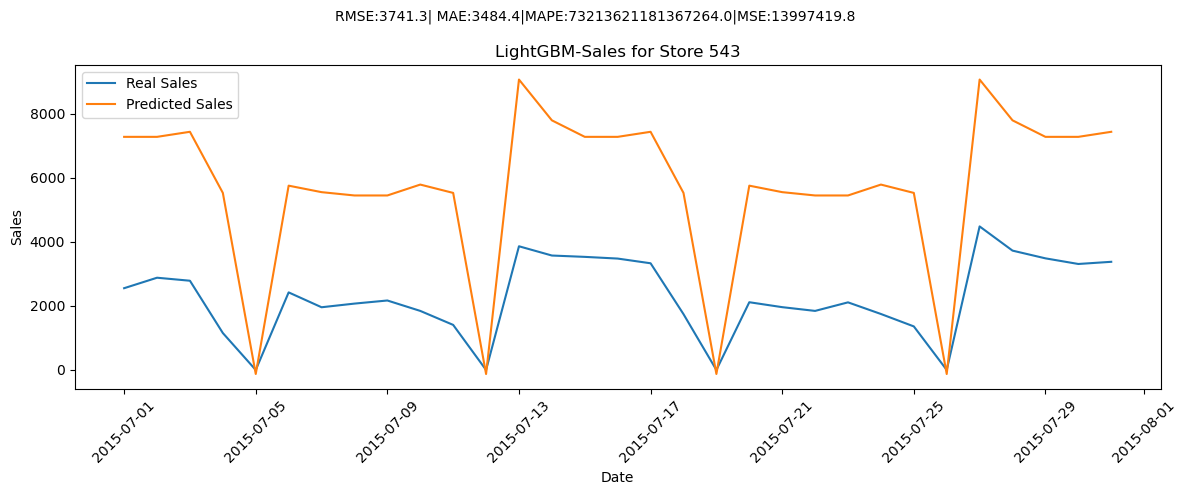

In [36]:
#Predictions vs Real values in test data for a specific store
store_ID=543
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesFULLLGBM']))
mae_store=mean_absolute_error(store_df['y'],store_df['PredictedSalesFULLLGBM'])
#r2_store=r2_score(store_df['y'],store_df['PredictedSalesFULLLGBM'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesFULLLGBM'])
mse=mean_squared_error(store_df['y'],store_df['PredictedSalesFULLLGBM'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesFULLLGBM'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'LightGBM-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.1f}| MAE:{mae_store:.1f}|MAPE:{mape:.1f}|MSE:{mse:.1f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Feature Importance Plot in order to choose the best variables for the model
var_selection=pd.DataFrame({'Feature':X_train.columns,'Importance':model_lgbm.feature_importances_}).sort_values(by='Importance',ascending=False)
print(var_selection.head(10)) #results

#Plot with the importance of each variable
plt.figure(figsize=(12,6))
plt.barh(var_selection['Feature'][::-1],var_selection['Importance'][::-1])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [39]:
#Most important variables from the above plot 
important_features=['DayOfYear',"CompetitionOpenSinceMonth","CompetitionDistance","CompetitionOpenSinceYear"]

#New model preparation with important variables
X_train_new=X_train[important_features]
X_test_new=X_test[important_features]

#New model
model_lgbm_new=LGBMRegressor(**par)
model_lgbm_new.fit(X_train_new,y_train,eval_set=[(X_test_new,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 3524.8
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 3524.8


LGBMRegressor(max_depth=5, metric='rmse', min_data_in_leaf=10, num_leaves=5,
              objective='regression_l2', verbose=-1)

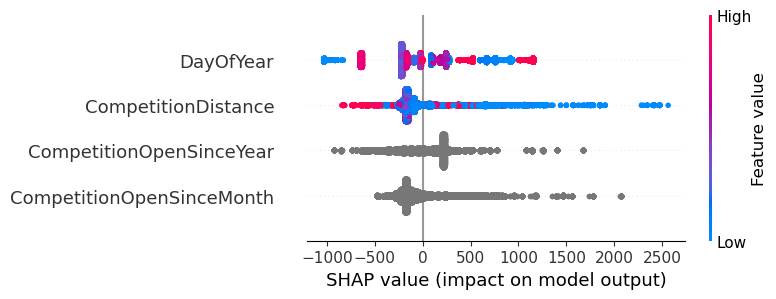

In [50]:
#SHAP
explainer_lgbm=shap.Explainer(model_lgbm_new)
#SHap values for x_test
shap_values1 = explainer_lgbm(X_test_new)
#plot
shap.summary_plot(shap_values1, X_test_new)

In [40]:
#Predictions
y_pred=model_lgbm_new.predict(X_test_new)

#Statistics for model fit
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
#r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
#Results
print(f"RMSE:{rmse:.1f}")
print(f"MAE:{mae:.1f}")
print(f"MAPE:{mape:.1f}")
#print(f"R²:{r2:.1f}")
print(f"MSE:{mse:.1f}")

RMSE:3524.8
MAE:2627.3
MAPE:3248245567904234496.0
MSE:12424247.5


In [41]:
#CROSS VALIDATION CHECK
cv_scores=cross_val_score(model_lgbm_new,X_train_new,y_train,cv=5,scoring='neg_root_mean_squared_error')

#RESULTS
print("Cross-Validation RMSE Scores:",-cv_scores)
print("Mean RMSE:",-np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

Cross-Validation RMSE Scores: [3625.86633376 3634.89469544 3650.06986183 3645.86002658 3621.69486261]
Mean RMSE: 3635.6771560445995
Standard Deviation of RMSE: 10.983713765005492


In [41]:
#Statistics for every model predicitions per store ID
test_data=test_data.copy() 
test_data['PredictedSales']=y_pred

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSales'])),
        'MAE':mean_absolute_error(df['y'],df['PredictedSales']),
        #"MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSales']),
        'R²':r2_score(df['y'],df['PredictedSales'])
    })
).reset_index()
print(store_results)
print(store_results["RMSE"].describe())

      Store          RMSE           MAE        R²
0         1   2048.810944   1336.219284 -0.572012
1         2   2217.817685   1607.384076 -0.234594
2         3   2788.207524   2265.076424 -0.039511
3         4   4999.564665   4772.756810 -0.793582
4         5   2298.936569   1730.083756 -0.244653
...     ...           ...           ...       ...
1110   1111   3130.895480   2632.712032 -1.321475
1111   1112   3984.479503   3237.387317 -0.263697
1112   1113   2534.076853   1902.307938 -0.012239
1113   1114  16736.001767  16051.885843 -3.193259
1114   1115   2752.949799   2061.191770 -0.041899

[1115 rows x 4 columns]
count     1115.000000
mean      3223.653230
std       1426.229894
min        967.683992
25%       2414.551157
50%       2778.274629
75%       3512.959558
max      16736.001767
Name: RMSE, dtype: float64


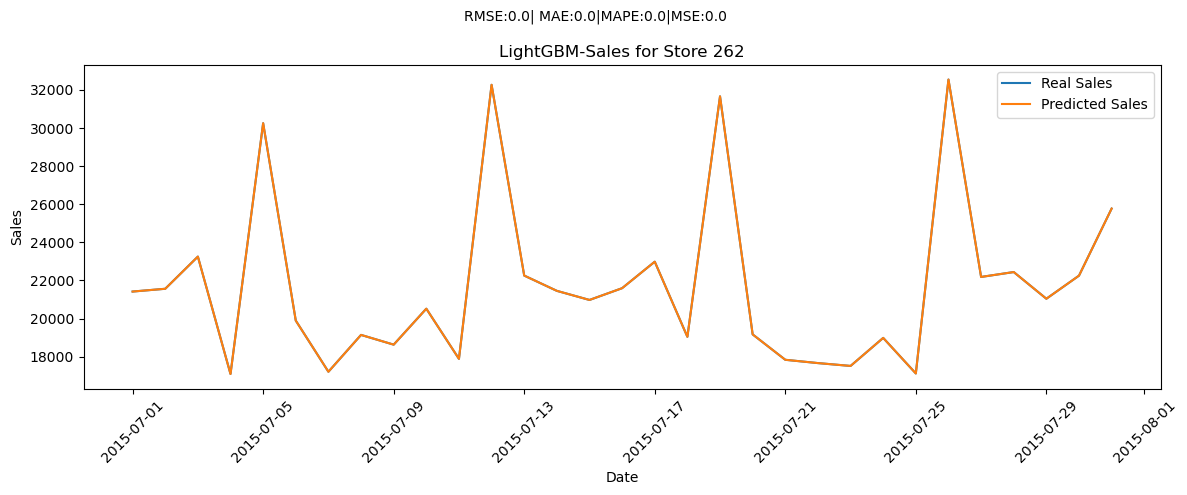

In [31]:
#Predictions vs Real values in test data for a specific store
store_ID=262
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSales']))
mae_store=mean_absolute_error(store_df['y'],store_df['PredictedSales'])
#r2_store=r2_score(store_df['y'],store_df['PredictedSalesFULLLGBM'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSales'])
mse=mean_squared_error(store_df['y'],store_df['PredictedSales'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSales'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'LightGBM-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.1f}| MAE:{mae_store:.1f}|MAPE:{mape:.1f}|MSE:{mse:.1f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 2987.82
Did not meet early stopping. Best iteration is:
[99]	valid_0's rmse: 2987.8


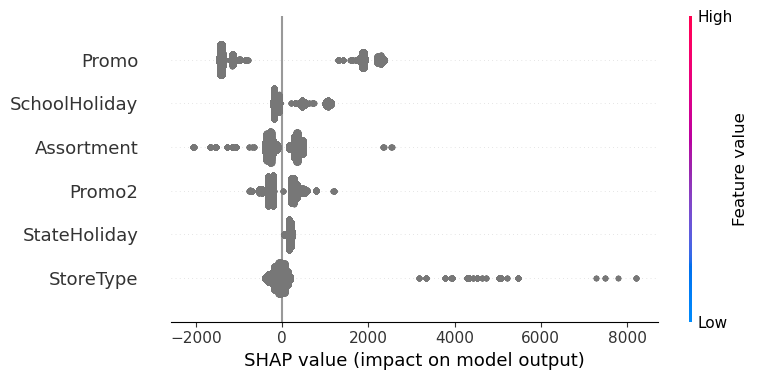

RMSE:2987.8
MAE:2279.1
MAPE:2438285613594761216.0
MSE:8926944.1
Cross-Validation RMSE Scores: [3141.06824171 3150.59244204 3156.25920647 3164.70626948 3151.19546194]
Mean RMSE: 3152.764324327907
Standard Deviation of RMSE: 7.730472244260701


In [42]:
#Model with some important variables
features=['Promo2',"Promo","StoreType","Assortment","StateHoliday","SchoolHoliday"]

#New model preparation with important variables
X_train_neww=X_train[features]
X_test_neww=X_test[features]

#New model
model_lgbm_neww=LGBMRegressor(**par)
model_lgbm_neww.fit(X_train_neww,y_train,eval_set=[(X_test_neww,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

#SHAP
explainer_lgbm=shap.Explainer(model_lgbm_neww)
#SHap values for x_test
shap_values1 = explainer_lgbm(X_test_neww)
#plot
shap.summary_plot(shap_values1, X_test_neww)

#Predictions
y_pred=model_lgbm_neww.predict(X_test_neww)

#Statistics for model fit
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
#r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
#Results
print(f"RMSE:{rmse:.1f}")
print(f"MAE:{mae:.1f}")
print(f"MAPE:{mape:.1f}")
#print(f"R²:{r2:.1f}")
print(f"MSE:{mse:.1f}")

#CROSS VALIDATION CHECK
cv_scores=cross_val_score(model_lgbm_neww,X_train_neww,y_train,cv=5,scoring='neg_root_mean_squared_error')
#RESULTS
print("Cross-Validation RMSE Scores:",-cv_scores)
print("Mean RMSE:",-np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

test_data=test_data.copy() 
test_data['PredictedSaless']=y_pred

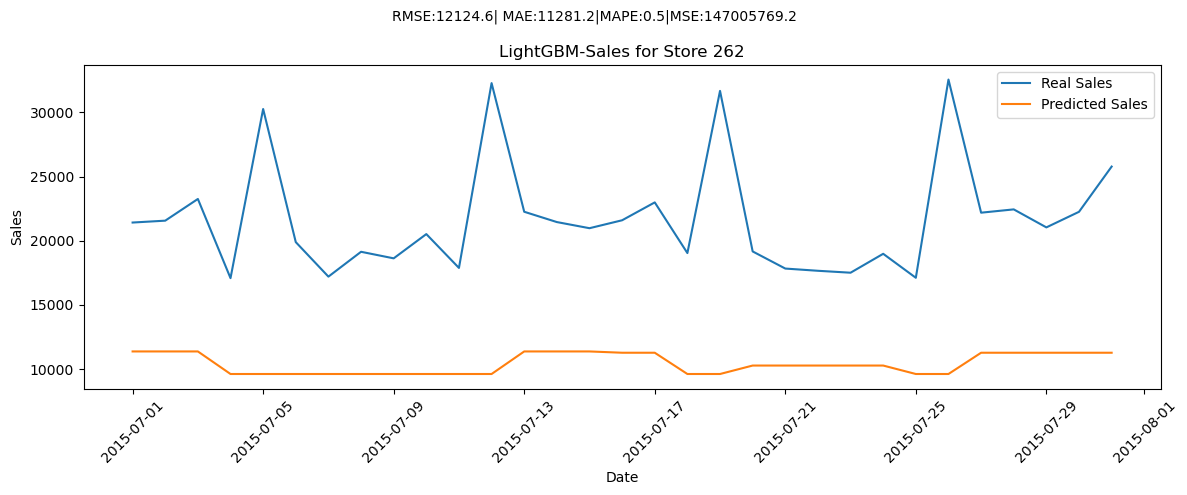

In [46]:
#Predictions vs Real values in test data for a specific store
store_ID=262
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSaless']))
mae_store=mean_absolute_error(store_df['y'],store_df['PredictedSaless'])
#r2_store=r2_score(store_df['y'],store_df['PredictedSaless'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSaless'])
mse=mean_squared_error(store_df['y'],store_df['PredictedSaless'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSaless'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'LightGBM-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.1f}| MAE:{mae_store:.1f}|MAPE:{mape:.1f}|MSE:{mse:.1f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
##The best model is the one with all the variables
#As a result i use all the variables for future predictions

In [37]:
#Time charachteristics for train data,test data and predictions data (t) 
def create_date_features(df):
    df["Date"]=pd.to_datetime(df["Date"])
    df["DayOfWeek"]=df["Date"].dt.dayofweek
    df["Month"]=df["Date"].dt.month
    df["DayOfYear"]=df["Date"].dt.day
    df["IsWeekend"]=(df["DayOfWeek"] >= 5).astype(int)
    return df

for df in [train_data,test_data,t]:
    create_date_features(df)

#Model variables
features=["StoreType","Assortment",'CompetitionOpenSinceMonth','CompetitionDistance',"CompetitionOpenSinceYear","Promo2SinceWeek","DayOfWeek",
"Month","DayOfYear","IsWeekend","Promo","Promo2","Promo2SinceYear","Store","PromoInterval","StateHoliday","SchoolHoliday","Open"]

#Variables that need to be converted as categorical
cat_cols=["CompetitionOpenSinceYear","Promo2SinceWeek","CompetitionOpenSinceMonth","StoreType","Assortment","Promo","Promo2","Promo2SinceYear","Store"
,"PromoInterval","StateHoliday","SchoolHoliday","Open"]

target="y"

# Split data
X_train,y_train=train_data[features],train_data[target]
X_test,y_test=test_data[features],test_data[target]
X_future=t[features]

#Features as categorical in all datasets
for col in cat_cols:
    for df in [X_train, X_test, X_future]:
        df[col] = df[col].astype("category")


lgbmpred_model=LGBMRegressor(**par)
lgbmpred_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])
#Predictions
future_preds=lgbmpred_model.predict(X_future)
future_preds[future_preds<0]=0
t["PredictedSales"]=future_preds

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 1294
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1294


            Date  PredictedSales
419   2015-09-17     4018.144111
1275  2015-09-16     4018.144111
2131  2015-09-15     4230.692317
2987  2015-09-14     5670.810870
3843  2015-09-13        0.000000
4699  2015-09-12     2520.851960
5555  2015-09-11     2520.851960
6411  2015-09-10     2520.851960
7267  2015-09-09     2520.851960
8123  2015-09-08     2559.978344
8979  2015-09-07     2952.226293
9835  2015-09-06        0.000000
10691 2015-09-05     2589.648684
11547 2015-09-04     4221.316461
12403 2015-09-03     4221.316461
13259 2015-09-02     4268.472279
14115 2015-09-01     4481.020485
14971 2015-08-31     6413.413585
15827 2015-08-30        0.000000
16683 2015-08-29     2709.576315
17539 2015-08-28     2709.576315
18395 2015-08-27     2520.851960
19251 2015-08-26     2520.851960
20107 2015-08-25     2559.978344
20963 2015-08-24     2952.226293
21819 2015-08-23        0.000000
22675 2015-08-22     2520.851960
23531 2015-08-21     4018.144111
24387 2015-08-20     4018.144111
25243 2015

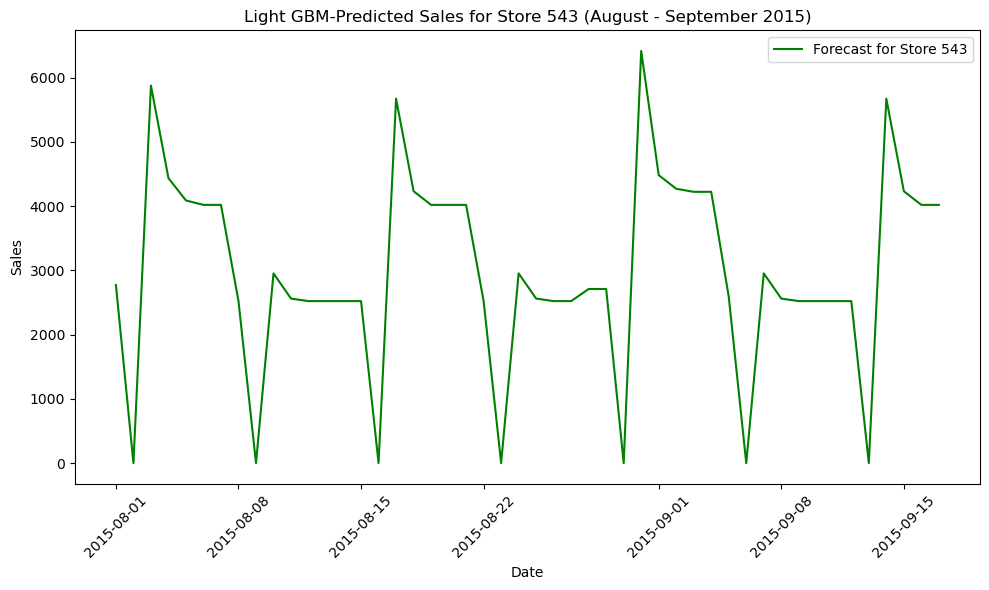

In [40]:
#Choose a store id
store_id=543
#Predictions for specific store
store_preds=t[t["Store"]==store_id][["Date","PredictedSales"]].copy()
print(store_preds) #check

#I create a function that returns only the predictions for stores
def plot_store_forecast(store_id):
    store_data=t[t["Store"]==store_id].copy()
    store_data.sort_values("Date",inplace=True)
    
    plt.figure(figsize=(10,6))
    plt.plot(store_data["Date"],store_data["PredictedSales"],label=f"Forecast for Store {store_id}",color='green')
    plt.title(f"Light GBM-Predicted Sales for Store {store_id} (August - September 2015)")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

#Function
plot_store_forecast(543)


In [44]:
#Split Store IDs in 3 parts becasuse python can't run
store_ids=test_data['Store'].unique()
n=len(store_ids)
one_third=n//3
two_third=2*(n//3)
first_part=store_ids[:one_third]
second_part=store_ids[one_third:two_third]
third_part=store_ids[two_third:]

In [ ]:
#Plots with predictions vs real values for test set for all the stores in first part
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesFULLLGBM']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSalesFULLLGBM'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesFULLLGBM'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesFULLLGBM'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesFULLLGBM'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f} | MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions vs real values for all the stores in second part
#For loop for all the stores
for store_id in second_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesFULLLGBM']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSalesFULLLGBM'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesFULLLGBM'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesFULLLGBM'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesFULLLGBM'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions vs real values for all the stores in third part
#For loop for all the stores
for store_id in third_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesFULLLGBM']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSalesFULLLGBM'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesFULLLGBM'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesFULLLGBM'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesFULLLGBM'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Model with standarized features beacause of the outliers
#scaler=StandardScaler()
#dummy variables
#X_train_dummies=pd.get_dummies(X_train,drop_first=True)
#X_test_dummies=pd.get_dummies(X_test,drop_first=True)
#Merge with data
#X_train_dummies,X_test_dummies=X_train_dummies.align(X_test_dummies,fill_value=0,axis=1)
#X_train_scaled=scaler.fit_transform(X_train_dummies)
#X_test_scaled=scaler.transform(X_test_dummies)

#As dataframe
#X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train_dummies.columns)
#X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test_dummies.columns)
#Some columns have True or False in dummy variables
#print(X_train_dummies.dtypes.value_counts())
#print(X_test_dummies.dtypes.value_counts())

#bool_columns=X_train_dummies.select_dtypes(include=['bool']).columns
#print(bool_columns)
#bool_columns1=X_test_dummies.select_dtypes(include=['bool']).columns
#print(bool_columns1)

#Convert bool as int
#X_train_dummies[bool_columns]=X_train_dummies[bool_columns].astype(int)
#X_test_dummies[bool_columns]=X_test_dummies[bool_columns].astype(int)
#print(X_train_dummies.dtypes.value_counts())#check
#print(X_test_dummies.dtypes.value_counts())#check

#model with scaling
#model_lgbms=LGBMRegressor(**par)
#model_lgbms.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

##PROBLEM WITH FEATURE NAMESS###

## XGBoost model

In [34]:
#XGBoost model
categorical_columns=['StoreType','Assortment','PromoInterval',"DayOfWeek","Open","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","PromoInterval","Promo2SinceWeek","Promo2SinceYear"] 
for col in categorical_columns:
   X_train[col]=X_train[col].astype('category')
   X_test[col]=X_test[col].astype('category')

#Hyperparameter tuning
param_grid={
    'max_depth':[3,5],
    'learning_rate':[0.01,0.1,0.3],
    'n_estimators':[100,300,500]
}

#XGBoost Regressor
xgb=XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=42,enable_categorical=True)

#Grid Search
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=3,n_jobs=-1,verbose=2)

#Model Train
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE Score: {-grid_search.best_score_}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.9s


KeyboardInterrupt: 

In [41]:
#Preparation
target='y'
cols=['y','Date',"StateHolidayIndicators","PromotionFlags","day","year","month","HolidayIndicators","Customers"] 
X_train=train_data.drop(columns=cols)
y_train=train_data[target]
X_test=test_data.drop(columns=cols)
y_test=test_data[target]
X_train,y_train=shuffle(X_train, y_train, random_state=42)

In [42]:
#XGBoost model with all the variables
categorical_columns=["StateHoliday",'StoreType','Assortment','PromoInterval',"DayOfWeek","Open","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","PromoInterval","Promo2SinceWeek","Promo2SinceYear","Promo","Promo2"] 
for col in categorical_columns:
   X_train[col]=X_train[col].astype('category')
   X_test[col]=X_test[col].astype('category')

#model with best parameters
xgb_model=XGBRegressor(objective='reg:squarederror',learning_rate=0.3,max_depth=5,n_estimators=500,verbosity=1,enable_categorical=True)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
#drop columns with predictions from x_test
X_test = X_test.loc[:, ~X_test.columns.str.startswith('Predicted')]

#predictions
y_predict=xgb_model.predict(X_test)

#model performance
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
#r2=r2_score(y_test,y_predict)
mape=mean_absolute_percentage_error(y_test,y_predict)
#results
print(f"RMSE:{rmse:.1f}")
#print(f"R2:{r2:.1f}")
print(f"MAPE:{mape:.1f}")

#CROSS VALIDATION
cv_scores=cross_val_score(xgb_model,X_train, y_train,cv=5,scoring='neg_root_mean_squared_error')
#Results
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

RMSE:981.9
MAPE:154992420605378784.0
Cross-Validation RMSE Scores: [875.86716703 863.83486766 864.40741951 864.48720298 855.62249985]
Mean RMSE: 864.8438314060928
Standard Deviation of RMSE: 6.447984662740082


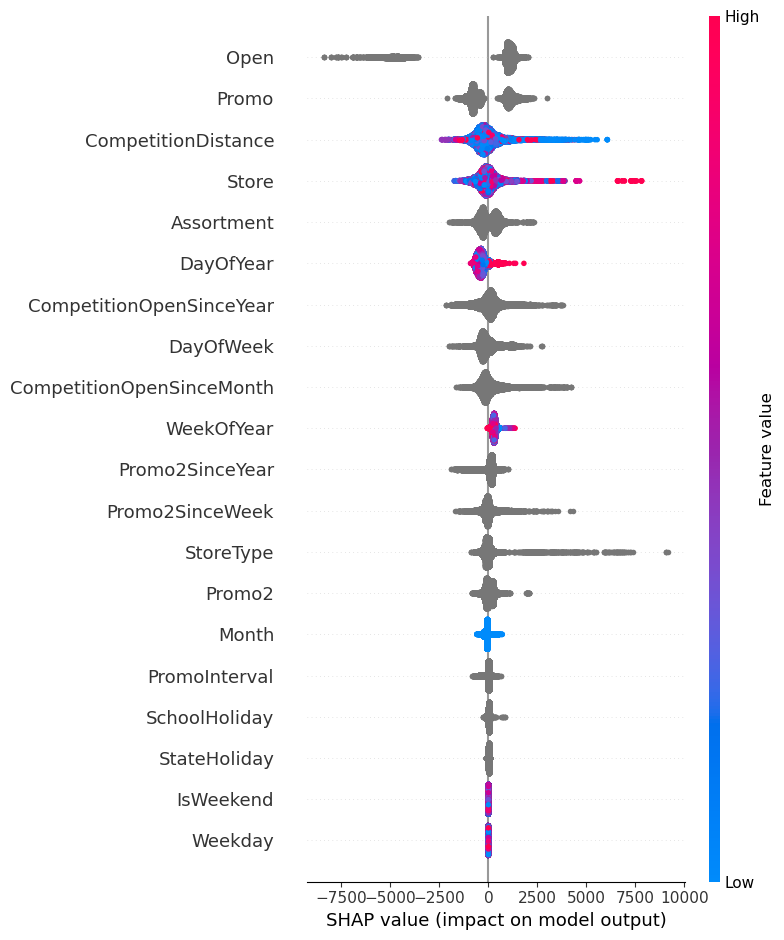

In [38]:
#SHAP for XGBOOST
explainer=shap.Explainer(xgb_model)
#SHap values for x_test
shap_values=explainer(X_test)
#plot
shap.summary_plot(shap_values, X_test)

In [44]:
#Statistics for every model predicitions per store ID
test_data=test_data.copy() 
test_data['PredictedSalesXG']=y_predict

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSalesXG'])),
        'R²':r2_score(df['y'],df['PredictedSalesXG']),
       # "MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSalesXG'])
    })
).reset_index()
print(store_results)
print(store_results["RMSE"].describe())

      Store         RMSE        R²
0         1   351.743491  0.953666
1         2   491.905433  0.939265
2         3   545.995789  0.960138
3         4  1255.163618  0.886953
4         5   522.052547  0.935817
...     ...          ...       ...
1110   1111   801.961495  0.847688
1111   1112  1712.014547  0.766700
1112   1113   499.763925  0.960629
1113   1114  3100.533587  0.856080
1114   1115  1013.135847  0.858888

[1115 rows x 3 columns]
count    1115.000000
mean      877.691705
std       440.356046
min       297.086463
25%       629.670309
50%       770.724419
75%       979.013375
max      5906.148339
Name: RMSE, dtype: float64


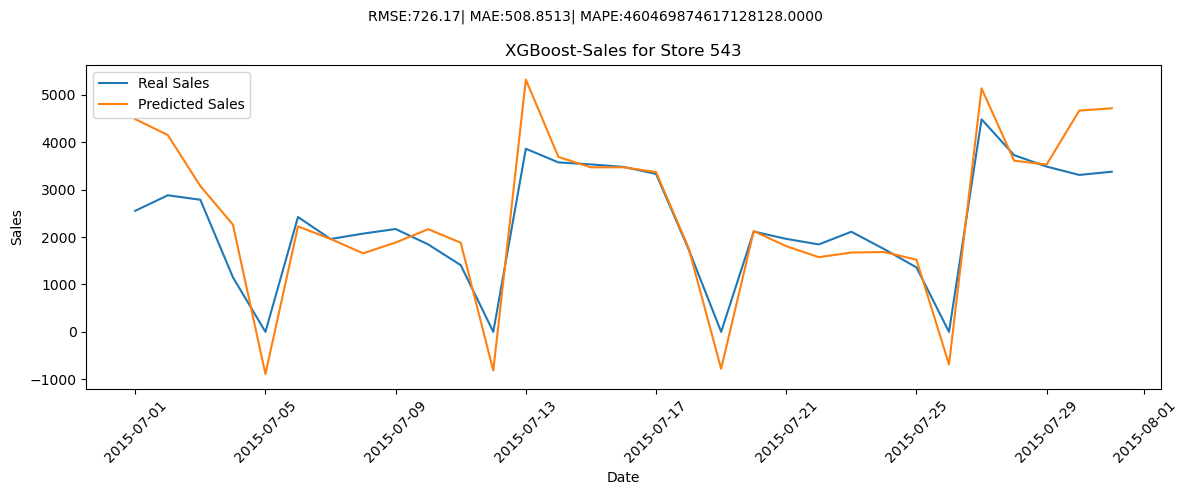

In [47]:
#Predictions for a specific store
store_ID=543
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesXG']))
r2_store=r2_score(store_df['y'],store_df['PredictedSalesXG'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesXG'])
mae=mean_absolute_error(store_df["y"],store_df["PredictedSalesXG"])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesXG'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'XGBoost-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae:.4f}| MAPE:{mape:.4f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

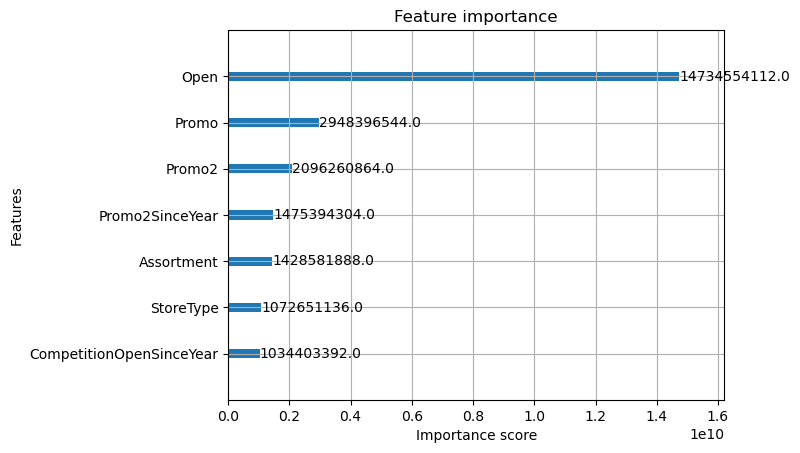

In [46]:
#Variables selection
plot_importance(xgb_model,importance_type='gain',max_num_features=7)
plt.show()

In [47]:
#important features from feature importance plot
selected_features=['Promo2','Open','Promo2SinceYear',"Promo","Assortment","StoreType"]
X_train_new=X_train[selected_features]
X_test_new=X_test[selected_features]

In [49]:
#new model with important features
xgb_model1=XGBRegressor(objective='reg:squarederror',learning_rate=0.05,verbosity=1,enable_categorical=True)
xgb_model1.fit(X_train_new,y_train)

#predictions
y_predict1=xgb_model1.predict(X_test_new)

#model performance
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
r2=r2_score(y_test,y_predict)
mape=mean_absolute_percentage_error(y_test,y_predict)
#results
print(f"RMSE:{rmse:.1f}")
print(f"R2:{r2:.1f}")
print(f"MAPE:{mape:.1f}")

RMSE:971.5
R2:0.9
MAPE:156303247935484640.0


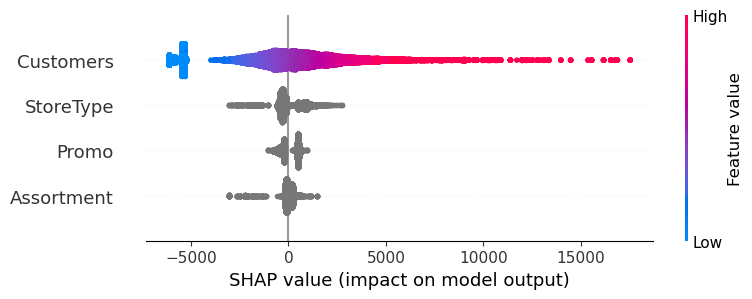

In [32]:
#SHAP for XGBOOST
explainer=shap.Explainer(xgb_model1)
#SHap values for x_test
shap_values=explainer(X_test_new)
#plot
shap.summary_plot(shap_values, X_test_new)

In [50]:
#CROSS VALIDATION
cv_scores=cross_val_score(xgb_model1, X_train_new, y_train,cv=5,scoring='neg_root_mean_squared_error')
#Results
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

Cross-Validation RMSE Scores: [2469.23419134 2482.44448318 2482.72455127 2487.63440633 2472.96914856]
Mean RMSE: 2479.001356136983
Standard Deviation of RMSE: 6.812222809006015


In [50]:
#Statistics for every model predicitions per store ID
test_data=test_data.copy() 
test_data['PredictedSalesXG1']=y_predict1

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSalesXG1'])),
        'R²':r2_score(df['y'],df['PredictedSalesXG1']),
       # "MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSalesXG1'])
    })
).reset_index()
print(store_results)
print(store_results["RMSE"].describe())

      Store          RMSE        R²
0         1   2672.575956 -1.674928
1         2   1643.588814  0.321955
2         3    857.846089  0.901599
3         4   2201.140587  0.652342
4         5   2247.229808 -0.189294
...     ...           ...       ...
1110   1111   1518.720211  0.453761
1111   1112   1538.153081  0.811679
1112   1113   1443.187601  0.671686
1113   1114  14283.781543 -2.054461
1114   1115   1045.967034  0.849594

[1115 rows x 3 columns]
count     1115.000000
mean      1934.572898
std       1360.526471
min        608.084837
25%       1133.438997
50%       1545.132701
75%       2240.490964
max      14283.781543
Name: RMSE, dtype: float64


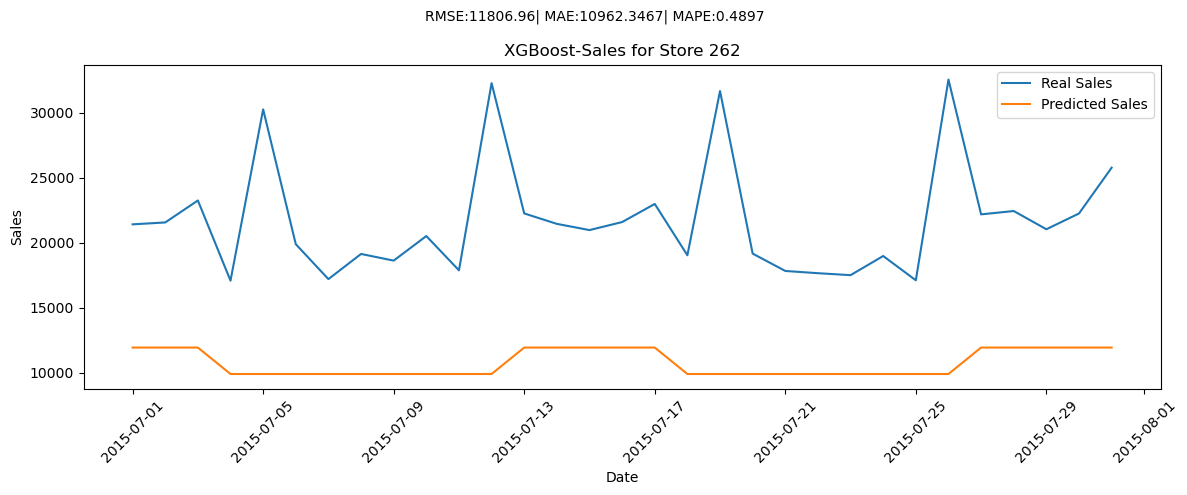

In [51]:
#Predictions for a specific store
store_ID=262
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesXG1']))
r2_store=r2_score(store_df['y'],store_df['PredictedSalesXG1'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesXG1'])
mae=mean_absolute_error(store_df["y"],store_df["PredictedSalesXG1"])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesXG1'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'XGBoost-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae:.4f}| MAPE:{mape:.4f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Plots for MODEL WITH ALL FEATURES
#Plots with predictions vs real values for all the stores in first part 
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXG']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXG'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXG'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXG'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots for MODEL WITH ALL FEATURES
#Plots with predictions vs real values  for all the stores in second part
#For loop for all the stores
for store_id in second_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXG']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXG'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXG'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXG'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots for MODEL WITH ALL FEATURES
#Plots with predictions vs real values for all the stores in third part
#For loop for all the stores
for store_id in third_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXG']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXG'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXG'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXG'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [51]:
#second model with some important variables
sel_features=['SchoolHoliday','Promo2','Promo','StoreType',"Assortment","StateHoliday"]
X_train_neww=X_train[sel_features]
X_test_neww=X_test[sel_features]

#second model
xgb_model_second=XGBRegressor(objective='reg:squarederror',learning_rate=0.05,verbosity=1,enable_categorical=True)
xgb_model_second.fit(X_train_neww,y_train)

#predictions
y_p=xgb_model_second.predict(X_test_neww)

#model performance
rmse=np.sqrt(mean_squared_error(y_test,y_p))
r2=r2_score(y_test,y_p)
mape=mean_absolute_percentage_error(y_test,y_p)
#results
print(f"MAPE:{mape:.4f}")
print(f"RMSE:{rmse:.4f}")
print(f"R2:{r2:.4f}")

MAPE:2428293735030938624.0000
RMSE:2982.2114
R2:0.3162


In [53]:
#CROSS VALIDATION
cv_scores=cross_val_score(xgb_model_second, X_train_neww, y_train,cv=5,scoring='neg_root_mean_squared_error')
#Results
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

Cross-Validation RMSE Scores: [3135.43114683 3142.57452076 3150.47919923 3157.23276308 3145.09576934]
Mean RMSE: 3146.1626798463085
Standard Deviation of RMSE: 7.353340288157501


In [ ]:
#SHAP for XGBOOST second model
explainer=shap.Explainer(xgb_model_second)
#SHap values for x_test
shap_values=explainer(X_test_neww)
#plot
shap.summary_plot(shap_values,X_test_neww)

In [52]:
#Statistics for every model predicitions per store ID with new model
test_data=test_data.copy() 
test_data['PredictedSalesXGBOOST']=y_p

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSalesXGBOOST'])),
        'R²':r2_score(df['y'],df['PredictedSalesXGBOOST']),
        "MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSalesXGBOOST'])
    })
).reset_index()
print(store_results)
print(store_results["RMSE"].describe())

      Store          RMSE        R²          MAPE
0         1   2734.366966 -1.800049  2.666494e+18
1         2   1988.362545  0.007653  2.166172e+18
2         3   1522.158654  0.690188  2.166172e+18
3         4   3484.295207  0.128862  2.965480e+18
4         5   2436.778716 -0.398384  2.352765e+18
...     ...           ...       ...           ...
1110   1111   2358.301098 -0.317120  2.166172e+18
1111   1112   2399.733872  0.541620  2.965480e+18
1112   1113   2331.388514  0.143213  2.883170e+18
1113   1114  14881.707751 -2.315536  2.883170e+18
1114   1115   2175.255033  0.349497  2.500249e+18

[1115 rows x 4 columns]
count     1115.000000
mean      2674.456554
std       1320.011315
min       1024.817543
25%       1989.533417
50%       2281.809738
75%       2879.482057
max      14881.707751
Name: RMSE, dtype: float64


In [52]:
#Predictions for a specific store with new model
store_ID=262
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesXGBOOST']))
r2_store=r2_score(store_df['y'],store_df['PredictedSalesXGBOOST'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesXGBOOST'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.2f}| R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'PredictedSalesXGBOOST'

In [ ]:
#Plots with predictions vs real values for all the stores in first part with new model
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXGBOOST']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXGBOOST'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXGBOOST'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions vs real values for all the stores in second part with new model
#For loop for all the stores
for store_id in second_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXGBOOST']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXGBOOST'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXGBOOST'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions vs real values for all the stores in third part with new model
#For loop for all the stores
for store_id in third_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXGBOOST']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXGBOOST'])
     mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXGBOOST'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [59]:
##PREDICTIONS FOR FIRST MODEL

#Time charachteristics for train data,test data and predictions data (t) 
def create_date_features(df):
    df["Date"]=pd.to_datetime(df["Date"])
    df["DayOfWeek"]=df["Date"].dt.dayofweek
    df["Month"]=df["Date"].dt.month
    df["DayOfYear"]=df["Date"].dt.day
    df["IsWeekend"]=(df["DayOfWeek"] >= 5).astype(int)
    return df

for df in [train_data,test_data,t]:
    create_date_features(df)

#Model variables
xg_features=["StoreType","Assortment",'CompetitionOpenSinceMonth','CompetitionDistance',"CompetitionOpenSinceYear","Promo2SinceWeek","DayOfWeek",
"Month","DayOfYear","IsWeekend","Promo","Promo2","Promo2SinceYear","Store","PromoInterval","StateHoliday","SchoolHoliday","Open"]

#Variables that need to be converted as categorical
cat_cols=["CompetitionOpenSinceYear","Open","Promo2SinceWeek","CompetitionOpenSinceMonth","Assortment","Promo","Promo2","Promo2SinceYear","Store"
,"PromoInterval","StateHoliday","SchoolHoliday","StoreType"]

target="y"

# Split data
X_train,y_train=train_data[xg_features],train_data[target]
X_test,y_test=test_data[xg_features],test_data[target]
X_futuree=t[xg_features]

#Features as categorical in all datasets
for col in cat_cols:
    for df in [X_train, X_test, X_futuree]:
        df[col] = df[col].astype("category")


xgpred_model=XGBRegressor(objective='reg:squarederror',learning_rate=0.3,max_depth=5,n_estimators=500,verbosity=1,enable_categorical=True)
xgpred_model.fit(X_train,y_train,eval_set=[(X_test,y_test)])
#Predictions
future_xgpreds=xgpred_model.predict(X_futuree)
future_xgpreds[future_xgpreds<0]=0
t["xgPredictedSales"]=future_xgpreds


[0]	validation_0-rmse:2795.89784
[1]	validation_0-rmse:2267.79604
[2]	validation_0-rmse:1927.01862
[3]	validation_0-rmse:1704.88370
[4]	validation_0-rmse:1557.89738
[5]	validation_0-rmse:1473.06671
[6]	validation_0-rmse:1391.46789
[7]	validation_0-rmse:1316.21413
[8]	validation_0-rmse:1275.80899
[9]	validation_0-rmse:1235.55940
[10]	validation_0-rmse:1202.40526
[11]	validation_0-rmse:1166.75391
[12]	validation_0-rmse:1155.72238
[13]	validation_0-rmse:1143.92601
[14]	validation_0-rmse:1128.07824
[15]	validation_0-rmse:1113.43750
[16]	validation_0-rmse:1100.36359
[17]	validation_0-rmse:1100.83583
[18]	validation_0-rmse:1102.80849
[19]	validation_0-rmse:1092.07593
[20]	validation_0-rmse:1085.10394
[21]	validation_0-rmse:1083.30175
[22]	validation_0-rmse:1074.50729
[23]	validation_0-rmse:1077.10212
[24]	validation_0-rmse:1075.28767
[25]	validation_0-rmse:1074.01901
[26]	validation_0-rmse:1072.72064
[27]	validation_0-rmse:1068.90759
[28]	validation_0-rmse:1062.46264
[29]	validation_0-rmse:1

            Date  xgPredictedSales
201   2015-09-17       6042.534180
1057  2015-09-16       5986.565918
1913  2015-09-15       6473.663086
2769  2015-09-14       8055.088867
3625  2015-09-13       5136.964355
4481  2015-09-12       5399.106445
5337  2015-09-11       5326.189941
6193  2015-09-10       5065.949707
7049  2015-09-09       4931.180176
7905  2015-09-08       5063.307617
8761  2015-09-07       5498.228027
9617  2015-09-06       5047.686523
10473 2015-09-05       5107.266113
11329 2015-09-04       6305.743652
12185 2015-09-03       6706.130371
13041 2015-09-02       6751.850586
13897 2015-09-01       7074.919434
14753 2015-08-31       8292.674805
15609 2015-08-30       5234.584961
16465 2015-08-29       5495.198730
17321 2015-08-28       5479.581543
18177 2015-08-27       4866.041992
19033 2015-08-26       4504.501953
19889 2015-08-25       4566.191406
20745 2015-08-24       4882.987305
21601 2015-08-23       5093.926758
22457 2015-08-22       5342.161621
23313 2015-08-21    

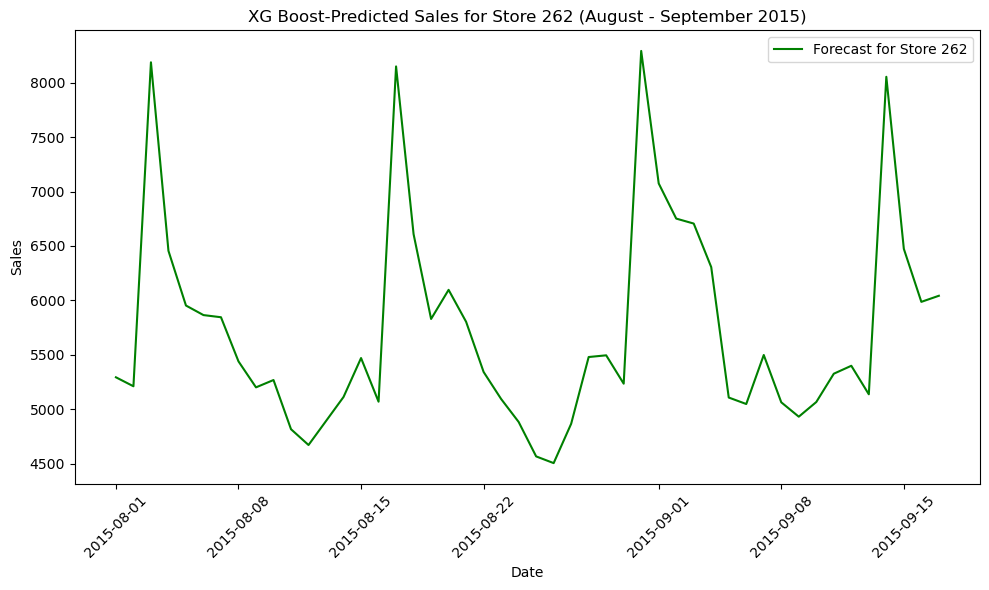

In [60]:
#Choose a store id
store_id=262
#Predictions for specific store
store_preds=t[t["Store"]==store_id][["Date","xgPredictedSales"]].copy()
print(store_preds) #check

#I create a function that returns only the predictions for stores
def plot_store_forecast_xg(store_id):
    store_data=t[t["Store"]==store_id].copy()
    store_data.sort_values("Date",inplace=True)
    
    plt.figure(figsize=(10,6))
    plt.plot(store_data["Date"],store_data["xgPredictedSales"],label=f"Forecast for Store {store_id}",color='green')
    plt.title(f"XG Boost-Predicted Sales for Store {store_id} (August - September 2015)")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

#Function
plot_store_forecast_xg(262)

### Further Experiments

In [63]:
#code that we can see how rmse changes when removing a variable 
#Features
xg_features=["StoreType", "Assortment", 'CompetitionOpenSinceMonth','CompetitionDistance', "CompetitionOpenSinceYear", "Open","Promo2SinceWeek", "DayOfWeek", "Month", "DayOfYear",
"IsWeekend", "Promo", "Promo2","Promo2SinceYear","Store","PromoInterval", "StateHoliday", "SchoolHoliday"]
target="y"

#Empty vector
results = []

for feature in xg_features:
    
    trial_features=[f for f in xg_features if f != feature]
    X_train_subset=X_train[trial_features]
    X_test_subset=X_test[trial_features]

    #Model
    model = XGBRegressor(objective='reg:squarederror', learning_rate=0.3,max_depth=5, n_estimators=500, enable_categorical=True)
    model.fit(X_train_subset, y_train)

    #Forecast
    preds=model.predict(X_test_subset)
    preds=np.clip(preds,a_min=0,a_max=None) 
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    results.append((feature,rmse))

# Results
results_df = pd.DataFrame(results, columns=["Removed_Feature", "RMSE"])
results_df.sort_values("RMSE")


,Removed_Feature,RMSE
1,Assortment,940.682772
2,CompetitionOpenSinceMonth,940.682772
3,CompetitionDistance,940.682772
4,CompetitionOpenSinceYear,940.682772
15,PromoInterval,940.682772
6,Promo2SinceWeek,940.682772
13,Promo2SinceYear,940.682772
10,IsWeekend,940.682772
0,StoreType,942.465726
16,StateHoliday,948.051581


In [ ]:
#MAPE without outliers

#def calculate_mape(y_true, y_pred):
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    #non_zero = y_true != 0
    #return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

#print(calculate_mape(store_df['y'],store_df['PredictedSales']))

### PCA #not needed

In [ ]:
#PCA  
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

In [ ]:
#Dummy variables for categorical data
#data = pd.get_dummies(data, columns=['StoreType'], prefix='StoreType')
#data = pd.get_dummies(data, columns=['Assortment'], prefix='Assortment')
#data = pd.get_dummies(data, columns=['PromoInterval'], prefix='PromoInterval') 

In [ ]:
#data.columns

In [ ]:
#We have T or F so i change the type in order to get 0 or 1 values
#data["Assortment_a"] = data["Assortment_a"].astype(int)
#data["Assortment_b"] = data["Assortment_b"].astype(int)
#data["Assortment_c"] = data["Assortment_c"].astype(int)

#data["PromoInterval_Feb,May,Aug,Nov"] = data["PromoInterval_Feb,May,Aug,Nov"].astype(int)
#data["PromoInterval_Jan,Apr,Jul,Oct"] = data["PromoInterval_Jan,Apr,Jul,Oct"].astype(int)
#data["PromoInterval_Mar,Jun,Sept,Dec"] = data["PromoInterval_Mar,Jun,Sept,Dec"].astype(int)

#data["StoreType_a"] = data["StoreType_a"].astype(int)
#data["StoreType_b"] = data["StoreType_b"].astype(int)
#data["StoreType_c"] = data["StoreType_c"].astype(int)
#data["StoreType_d"] = data["StoreType_d"].astype(int)

In [ ]:
#data.head(1) #check

In [ ]:
#data.columns

In [ ]:
#features=['DayOfWeek', 'Customers', 'Open', 'CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','PromotionFlags', 'HolidayIndicators',
#'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d','Assortment_a', 'Assortment_b', 'Assortment_c','PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
#'PromoInterval_Mar,Jun,Sept,Dec']

#X=data[features]
#y=data['Sales']

#scaler=StandardScaler()
#X_scaled=scaler.fit_transform(X)

#pca=PCA(n_components=5)
#X_pca=pca.fit_transform(X_scaled)

#print(pca.explained_variance_ratio_)

In [ ]:
#pca_results=pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)],index=X.columns)
#pca_results = pca_results.round(3)
#print(pca_results)